In [2]:
import os
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import random

# Specify the path to your folder
folder_path = 'server_logs_multinum'

# Get a list of files in the folder
files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.json')]

# Sort files by modification time (latest first)
files.sort(key=os.path.getmtime, reverse=True)

In [3]:
# files[5]

In [4]:
len(files)

18

In [5]:
all_data = pd.DataFrame()
all_user_details_df = pd.DataFrame()

for n in range(0, len(files)):
    # Get the path of the latest file
    latest_file_path = files[n]

    # Read the JSON file into a Python object
    with open(latest_file_path, 'r') as f:
        try:
            data = json.load(f)
        except json.JSONDecodeError:
            print(f"Error decoding JSON in file: {latest_file_path}")
            continue  # Skip this file

        # Check if data is a string and needs to be parsed again
        if isinstance(data, str):
            try:
                data = json.loads(data)
            except json.JSONDecodeError:
                print(f"Error decoding JSON in file: {latest_file_path}")
                continue  # Skip this file

        # Ensure the data is a dictionary
        if not isinstance(data, dict):
            print(f"Unexpected data format in file: {latest_file_path}")
            continue

    # Extract userDetails
    user_details = data.get("userDetails", {})
    user_details_df = pd.DataFrame([user_details])
    
    # Add user details to the all_user_details_df DataFrame
    all_user_details_df = pd.concat([all_user_details_df, user_details_df], ignore_index=True)

    
    # Extract the "events" data
    events_data = data.get("events", [])
    events_df = pd.json_normalize(events_data)

    # Add a new column "userId" to the "events" DataFrame
    if 'contactNumber' in user_details and len(user_details['contactNumber']) >= 4:
        events_df['userId'] = user_details['contactNumber'][-4:]  # Use the 4 digits of phoneNo
    else:
        events_df['userId'] = user_details['participantName'][-4:]
        print(f"Missing or invalid contact number in file: {latest_file_path}")
        # continue  # Skip this file if contactNumber is not valid

    # Concatenate data
    all_data = pd.concat([all_data, events_df], ignore_index=True)

# # Output the combined DataFrame
# print(all_data)

In [6]:
all_user_details_df

,participantSeed,endTime,participantName,email,age,contactNumber,gender,educationLevel,currentAddress,devicePixelRatio
0,1748289296528,1748290980705,Rajavardhan Ramavath,rrajav22@iitk.ac.in,20,8125848221,male,Bachelors,"Hall 3, IIT Kanpur",1.25
1,1748260280473,1748262048690,Anirudh Singh,sanirudh23@iitk.ac.in,20,6397561276,male,Bachelors,D-338 Hall 2,1.00
2,1748271386410,1748272941957,Rishav Raj,rraj22@iitk.ac.in,20,7488126386,male,Bachelors,Hall 5 IITK,1.25
3,1748251669176,1748253732967,Gourav Bajwa,"gouravb24@iitk,ac.in",19,8168140031,male,Bachelors,hall 13 f-307,1.00
4,1748250749873,1748252582255,Abhay Shukla,abhays24@iitk.ac.in,19,9236518907,male,Bachelors,"Kanpur, UP",1.00
5,1748241666912,1748244803167,Bheeni Gupta,bheeni1104@gmail.com,21,7303285009,female,Masters,IIT Kanpur,1.50
6,1748239834991,1748243872759,Parth Goel,parthg24@iitk.ac.in,24.5,06395976533,male,Masters,hall 14,1.35
7,1748241554897,1748243389521,shubham,shubham.msnp1242611.nfsu.ac.in,23,7357927283,male,,Gandhingar,0.80
8,1748237851109,1748240778216,Mrudula,mrudula.msnp1242610@nfsu.ac.in,26,8975830407,female,Bachelors,"hall of residence 4, E-315",1.25
9,1748238975111,1748240637541,Mohd Talha,mdtalha24@iitk.ac.in,19,8384825385,male,Bachelors,Kanpur,1.25


In [7]:
all_user_details_df['age'] = pd.to_numeric(all_user_details_df['age'], errors='coerce')
all_user_details_df['age'].describe()

count    18.000000
mean     21.583333
std       2.510273
min      18.000000
25%      20.000000
50%      21.000000
75%      23.000000
max      26.000000
Name: age, dtype: float64

In [7]:
# Convert both columns to numeric (milliseconds to seconds)
all_user_details_df['participantSeed'] = pd.to_numeric(all_user_details_df['participantSeed']) / 1000
all_user_details_df['endTime'] = pd.to_numeric(all_user_details_df['endTime']) / 1000

# Compute difference in minutes
all_user_details_df['tota_dur'] = (all_user_details_df['endTime'] - all_user_details_df['participantSeed']) / 60
all_user_details_df

,participantSeed,endTime,participantName,email,age,contactNumber,gender,educationLevel,currentAddress,devicePixelRatio,tota_dur
0,1.748289e+09,1.748291e+09,Rajavardhan Ramavath,rrajav22@iitk.ac.in,20,8125848221,male,Bachelors,"Hall 3, IIT Kanpur",1.25,28.069617
1,1.748260e+09,1.748262e+09,Anirudh Singh,sanirudh23@iitk.ac.in,20,6397561276,male,Bachelors,D-338 Hall 2,1.00,29.470283
2,1.748271e+09,1.748273e+09,Rishav Raj,rraj22@iitk.ac.in,20,7488126386,male,Bachelors,Hall 5 IITK,1.25,25.925783
3,1.748252e+09,1.748254e+09,Gourav Bajwa,"gouravb24@iitk,ac.in",19,8168140031,male,Bachelors,hall 13 f-307,1.00,34.396517
4,1.748251e+09,1.748253e+09,Abhay Shukla,abhays24@iitk.ac.in,19,9236518907,male,Bachelors,"Kanpur, UP",1.00,30.539700
5,1.748242e+09,1.748245e+09,Bheeni Gupta,bheeni1104@gmail.com,21,7303285009,female,Masters,IIT Kanpur,1.50,52.270917
6,1.748240e+09,1.748244e+09,Parth Goel,parthg24@iitk.ac.in,24.5,06395976533,male,Masters,hall 14,1.35,67.296133
7,1.748242e+09,1.748243e+09,shubham,shubham.msnp1242611.nfsu.ac.in,23,7357927283,male,,Gandhingar,0.80,30.577067
8,1.748238e+09,1.748241e+09,Mrudula,mrudula.msnp1242610@nfsu.ac.in,26,8975830407,female,Bachelors,"hall of residence 4, E-315",1.25,48.785117
9,1.748239e+09,1.748241e+09,Mohd Talha,mdtalha24@iitk.ac.in,19,8384825385,male,Bachelors,Kanpur,1.25,27.707167


In [8]:
all_user_details_df['participantName'].tolist()

['Rajavardhan Ramavath',
 'Anirudh Singh',
 'Rishav Raj',
 'Gourav Bajwa',
 'Abhay Shukla',
 'Bheeni Gupta',
 'Parth Goel',
 'shubham',
 'Mrudula',
 'Mohd Talha',
 'Megha ',
 'Akshita Dabral',
 'Prakhar Gupta',
 'Ganesh Jaiswal',
 'Aman Upadhyay',
 'Sukanya Mandal',
 'Sritan',
 'Kashish']

In [9]:
all_user_details_df[all_user_details_df['participantName']=='Hitesh']

,participantSeed,endTime,participantName,email,age,contactNumber,gender,educationLevel,currentAddress,devicePixelRatio,tota_dur


In [10]:
all_user_details_df['contactNumber'].tolist()

['8125848221',
 '6397561276',
 '7488126386',
 '8168140031',
 '9236518907',
 '7303285009',
 '06395976533',
 '7357927283',
 '8975830407',
 '8384825385',
 '8920130695',
 '07505521033',
 '7307146583',
 '7355014214',
 '7224898320',
 '7001862238',
 '9392596962',
 '07042368877']

In [11]:
# participants = all_user_details_df.copy()
# participants['Rating_task']= np.nan
# participants['Africa_Alloy']='Yes'
# participants['Raja_Rani_oz_$'] = np.nan

# participants['Compensated']= 'No'

# participants.drop(columns=['age','gender','currentAddress','devicePixelRatio', 'totalTime','start_time'], inplace=True)

# # participants.to_csv('tod_L_sv.csv', index=False)

In [12]:
all_data

,currentTrial,FrameOrderLog,trial_type,trial,frame,duration,response,target,color,arrangement,A,B,userId
0,0,"[[3, 17, 20, 14, 5, 23, 7, 6, 16, 15, 8, 19, 2...",main,41,0,10450,C,C,Red,ABC,17,67,8221
1,1,"[[7, 15, 9, 0, 14, 13, 5, 20, 1, 2, 16, 19, 8,...",main,4,0,1359,A,A,Red,CBA,36,30,8221
2,2,"[[3, 10, 5, 23, 17, 11, 16, 18, 22, 9, 14, 1, ...",catch,66,0,4230,B,A,Red,CBA,77,52,8221
3,3,"[[5, 16, 4, 6, 8, 20, 9, 15, 7, 3, 22, 2, 23, ...",main,91,0,1198,C,A,Red,CBA,41,36,8221
4,4,"[[15, 8, 16, 6, 14, 4, 13, 0, 7, 2, 17, 12, 21...",catch,29,0,702,A,A,Red,CAB,72,52,8221
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,91,"[[21, 14, 18, 9, 6, 7, 22, 1, 19, 17, 4, 11, 3...",main,70,0,12395,B,C,Red,BCA,43,68,8877
1724,92,"[[4, 9, 22, 5, 1, 3, 17, 10, 8, 20, 21, 7, 0, ...",main,55,0,2290,B,C,Red,BCA,42,63,8877
1725,93,"[[18, 2, 20, 1, 14, 19, 21, 12, 23, 17, 4, 9, ...",catch,69,0,5856,C,A,Blue,BAC,75,57,8877
1726,94,"[[12, 19, 3, 16, 14, 1, 22, 20, 6, 5, 13, 8, 2...",main,3,0,2139,C,A,Red,ACB,25,20,8877


In [13]:
# Extract last 4 digits of contactNumber as userId in all_user_details_df
all_user_details_df['userId'] = all_user_details_df['contactNumber'].astype(str).str[-4:]

# Ensure userId in accuracy_per_user is also string for proper merging
# accuracy_per_user = (
#     all_data[all_data['trial_type'] != 'main']
#     .groupby('userId')['response']
#     .apply(lambda x: (x == 'T').mean())  # Compute accuracy
#     .reset_index(name='accuracy')  # Convert to DataFrame
# )
accuracy_per_user = (
    all_data[all_data['trial_type'] != 'main']
    .groupby('userId')
    .apply(lambda df: (df['response'] == df['target']).mean())
    .reset_index(name='accuracy')
)
# Convert userId to string for consistency
accuracy_per_user['userId'] = accuracy_per_user['userId'].astype(str)

# Identify users with accuracy < 80%
low_accuracy_users = accuracy_per_user[accuracy_per_user['accuracy'] < 0.8]

# Merge with user details
low_accuracy_users_details = low_accuracy_users.merge(
    all_user_details_df, on='userId', how='left'
)

# Display result
# low_accuracy_users_details
removed_user_count = len(low_accuracy_users)

# Extract userIds from the low_accuracy_users DataFrame
low_accuracy_user_ids = low_accuracy_users['userId'].tolist()

# Filter out users from all_data based on the userIds in low_accuracy_users
filtered_data = all_data[~all_data['userId'].isin(low_accuracy_user_ids)]

# Output the count of removed users
print(f"Number of users removed: {removed_user_count}")
# low_accuracy_users_details
# # Optionally, return or save the filtered data
# # filtered_data

# # Compute percentage of rows with duration < 100 and > 10000 per user (from all_data)
# duration_stats = all_data.groupby('userId')['duration'].agg(
#     total_rows='count',
#     below_100=lambda x: (x < 100).mean() * 100,   # % of rows < 100
#     above_20000=lambda x: (x > 20000).mean() * 100  # % of rows > 10000
# ).reset_index()

# # Merge accuracy data with duration stats
# user_summary = accuracy_per_user.merge(duration_stats, on='userId', how='left')

# # Merge with user details
# user_summary = user_summary.merge(all_user_details_df, on='userId', how='left')

# # Display the DataFrame
# user_summary

# # Filter out users from all_data based on the userIds in low_accuracy_users
# filtered_data = filtered_data[~filtered_data['userId'].isin(user_summary[user_summary['above_20000']>50]['userId'].tolist())]

Number of users removed: 1


/var/folders/kc/rbd8sj0d2q7bh_61jwm5hsf00000gn/T/ipykernel_3016/1732677401.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: (df['response'] == df['target']).mean())


In [14]:
accuracy_per_user

,userId,accuracy
0,0031,1.000000
1,0407,1.000000
2,0695,0.958333
3,1033,1.000000
4,1276,1.000000
5,2238,1.000000
6,4214,1.000000
7,5009,1.000000
8,5385,1.000000
9,6386,1.000000


In [15]:
import pandas as pd

def clean_rt_data_with_report(
    df,
    participant_col='participant_id',
    rt_col='RT',
    response_col='response',
    min_rt=100,
    validity_threshold=0.80,
    total_expected_trials_per_participant=None,
    catch_trial_exclusions=None
):
    """
    Cleans RT data and prints a report similar to a method section paragraph.

    Parameters:
        df: Original DataFrame.
        participant_col: Column identifying participants.
        rt_col: Column with response times.
        response_col: Response column to check for missingness.
        min_rt: Minimum RT threshold.
        validity_threshold: Minimum proportion of valid trials.
        total_expected_trials_per_participant: Optional, used to detect severe missingness.
        catch_trial_exclusions: Optional list of participant_ids excluded for catch trial failure.

    Returns:
        cleaned_df: Filtered DataFrame.
        removed_user_df: DataFrame of excluded participants.
        summary_text: String report of exclusions and retained data.
    """
    df = df.copy()
    n_initial_participants = df[participant_col].nunique()

    # Record participants removed due to catch trials
    catch_removed = set(catch_trial_exclusions) if catch_trial_exclusions else set()

    # Remove rows with missing data in key columns
    df = df.dropna(subset=[participant_col, rt_col, response_col])

    # Optional: detect participants with majority missing RTs (technical error)
    if total_expected_trials_per_participant:
        rt_counts = df.groupby(participant_col)[rt_col].count()
        severely_missing = rt_counts[rt_counts < total_expected_trials_per_participant * 0.2].index
    else:
        severely_missing = []

    # Remove trials with RT < min_rt
    df = df[df[rt_col] >= min_rt]

    # Compute participant-specific upper RT thresholds
    def compute_upper_threshold(rt_series):
        q75 = rt_series.quantile(0.75)
        q25 = rt_series.quantile(0.25)
        iqr = q75 - q25
        return q75 + 1.75 * iqr

    df['upper_threshold'] = df.groupby(participant_col)[rt_col].transform(compute_upper_threshold)
    df['valid'] = df[rt_col] <= df['upper_threshold']

    # Track all participants
    total_trials = df.groupby(participant_col).size()
    valid_trials = df[df['valid']].groupby(participant_col).size().reindex(total_trials.index, fill_value=0)
    valid_ratio = (valid_trials / total_trials).fillna(0)

    # Exclude participants with low valid trial proportion
    low_validity_users = valid_ratio[valid_ratio < validity_threshold].index
    retained_users = valid_ratio[valid_ratio >= validity_threshold].index.difference(severely_missing).difference(catch_removed)

    # Prepare removed user report
    removed_users = pd.DataFrame({
        participant_col: valid_ratio.index,
        'total_trials': total_trials,
        'valid_trials': valid_trials,
        'valid_pct': (valid_ratio * 100).round(2)
    })
    removed_users = removed_users[removed_users[participant_col].isin(low_validity_users.union(severely_missing))]

    # Final cleaned data
    df_clean = df[df[participant_col].isin(retained_users) & df['valid']].copy()
    df_clean.drop(columns=['valid', 'upper_threshold'], inplace=True)

    # Summary text
    n_retained = df_clean[participant_col].nunique()
    total_trials_before = df.shape[0]
    total_trials_after = df_clean.shape[0]
    trials_removed = total_trials_before - total_trials_after
    percent_removed = (trials_removed / total_trials_before) * 100

    summary = (
        f"Data were collected from {n_initial_participants + len(catch_removed)} participants. "
        f"{len(catch_removed)} participant{'s' if len(catch_removed)!=1 else ''} were excluded for failing to meet the predefined accuracy threshold on catch trials. "
        f"{len(severely_missing)} participant{'s' if len(severely_missing)!=1 else ''} were excluded due to a technical error resulting in extensive missing RT data. "
        f"{len(low_validity_users)} participant{'s' if len(low_validity_users)!=1 else ''} were excluded for having fewer than {int(validity_threshold * 100)}% valid trials. "
        f"This left a total of {n_retained} participant{'s' if n_retained != 1 else ''} for subsequent analyses. "
        f"Within the retained sample, individual trials were excluded if RT < {min_rt} ms or exceeded a participant-specific upper threshold "
        f"(defined as the 75th percentile + 1.75 × IQR of that participant’s RTs). "
        f"A total of {trials_removed} trials ({percent_removed:.1f}% of all trials) were excluded, resulting in {total_trials_after} valid trials "
        f"({100 - percent_removed:.1f}% of the total) available for analysis."
    )

    print("\n" + summary)
    return df_clean, removed_users, summary

In [16]:
# Example usage (replace 'filtered_data' with your actual DataFrame):
valid_trials_df,removed_users, summary  = clean_rt_data_with_report(filtered_data, participant_col='userId',
    rt_col='duration',
    response_col='response',
    min_rt=100,
    validity_threshold=0.80,
    total_expected_trials_per_participant=180,
    catch_trial_exclusions=low_accuracy_user_ids)
# summary


Data were collected from 18 participants. 1 participant were excluded for failing to meet the predefined accuracy threshold on catch trials. 0 participants were excluded due to a technical error resulting in extensive missing RT data. 0 participants were excluded for having fewer than 80% valid trials. This left a total of 17 participants for subsequent analyses. Within the retained sample, individual trials were excluded if RT < 100 ms or exceeded a participant-specific upper threshold (defined as the 75th percentile + 1.75 × IQR of that participant’s RTs). A total of 125 trials (7.7% of all trials) were excluded, resulting in 1506 valid trials (92.3% of the total) available for analysis.


In [17]:
valid_trials_df

,currentTrial,FrameOrderLog,trial_type,trial,frame,duration,response,target,color,arrangement,A,B,userId
4,4,"[[15, 8, 16, 6, 14, 4, 13, 0, 7, 2, 17, 12, 21...",catch,29,0,702,A,A,Red,CAB,72,52,8221
5,5,"[[12, 20, 19, 0, 5, 15, 7, 2, 6, 18, 8, 22, 4,...",main,11,0,689,C,A,Red,ACB,41,38,8221
6,6,"[[13, 11, 4, 12, 20, 8, 7, 17, 19, 3, 16, 21, ...",main,54,0,724,C,A,Red,BCA,39,36,8221
7,7,"[[4, 11, 5, 16, 14, 21, 18, 1, 13, 0, 22, 2, 2...",main,12,0,465,C,C,Red,BAC,45,63,8221
8,8,"[[1, 19, 13, 2, 12, 11, 7, 17, 21, 23, 10, 15,...",main,53,0,572,A,C,Red,CBA,27,54,8221
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,91,"[[21, 14, 18, 9, 6, 7, 22, 1, 19, 17, 4, 11, 3...",main,2,0,569,A,C,Red,CAB,40,67,6962
1628,92,"[[4, 9, 22, 5, 1, 3, 17, 10, 8, 20, 21, 7, 0, ...",main,65,0,583,C,C,Red,ACB,36,74,6962
1629,93,"[[18, 2, 20, 1, 14, 19, 21, 12, 23, 17, 4, 9, ...",main,31,0,636,B,C,Red,ACB,41,61,6962
1630,94,"[[12, 19, 3, 16, 14, 1, 22, 20, 6, 5, 13, 8, 2...",main,9,0,1423,A,C,Red,CAB,40,62,6962


In [18]:
valid_trials_df.to_csv('filtered_data_vpsyco_numerical.csv', index=False) 

In [61]:
# from scipy.stats import zscore
# # Log-transform the RTs to reduce skewness
# filtered_data['log_RT'] = np.log(filtered_data['duration'] + 1)  # add 1 to avoid log(0)

# # Calculate z-scores on the log-transformed data
# filtered_data['z_score'] = zscore(filtered_data['log_RT'])

# # Define threshold (commonly ±2 or ±3)
# threshold = 2

# # Exclude outliers
# filtered = filtered_data[(filtered_data['z_score'] <= threshold) & (filtered_data['z_score'] >= -threshold)]


In [62]:
# all_data[all_data['userId']=='4214']['duration'].mean(), all_data[all_data['userId']=='4214']['duration'].std()

In [63]:
# import pandas as pd
# import numpy as np

# def exclude_trials_per_user(df, rt_col='duration', user_col='userId', lower_bound=100, iqr_multiplier=1.75):
#     valid_trials_list = []
#     df =  df[df['trial_type']!='catch']
#     for user, group in df.groupby(user_col):
#         # Drop NaNs for threshold calculation
#         rt_data = group[rt_col].dropna()
#         if len(rt_data) == 0:
#             # If no RT data, keep all trials (or decide to exclude all)
#             valid_trials_list.append(group)
#             continue
        
#         Q1 = np.percentile(rt_data, 25)
#         Q3 = np.percentile(rt_data, 75)
#         IQR = Q3 - Q1
#         upper_threshold = Q3 + iqr_multiplier * IQR
        
#         # Filter valid trials: duration >= lower_bound and <= upper_threshold, or duration is NaN
#         valid_trials = group[(group[rt_col].isna()) | 
#                              ((group[rt_col] >= lower_bound) & (group[rt_col] <= upper_threshold))]
#         valid_trials_list.append(valid_trials)
    
#     # Concatenate all valid trials
#     valid_df = pd.concat(valid_trials_list).reset_index(drop=True)
#     return valid_df

# # Example usage (replace 'filtered_data' with your actual DataFrame):
# valid_trials_df = exclude_trials_per_user(filtered_data)

In [64]:
# len(valid_trials_df)/len(filtered_data)

In [65]:
# len(valid_trials_df)

In [66]:
# (len(filtered_data)-len(valid_trials_df))/len(filtered_data)

In [67]:
# len(filtered_data)-len(valid_trials_df)

In [68]:
# (len(filtered_data)-len(filtered))/len(filtered_data)*100

In [69]:
# import numpy as np

# # Compute Q1 (25th percentile) and Q3 (75th percentile)
# Q1 = np.percentile(filtered_data['duration'], 25)
# Q3 = np.percentile(filtered_data['duration'], 75)

# # Compute IQR
# IQR = Q3 - Q1

# # Set the outlier thresholds
# lower_threshold = 100
# # Q1 - 1.75 * IQR
# upper_threshold = Q3 + 1.75 * IQR

# print(f"Lower Threshold: {lower_threshold:.2f}")
# print(f"Upper Threshold: {upper_threshold:.2f}")

In [70]:
# upper_threshold = 8000

In [71]:
# outliers = filtered_data[(filtered_data['duration'] < lower_threshold) |
#                              (filtered_data['duration'] > upper_threshold)]
# print("Outliers:")
# print(len(outliers))
# print( "Total Trials:")
# print(len(filtered_data))
# # Remove outliers if needed
# filtered= filtered_data[(filtered_data['duration'] >= lower_threshold) & 
#                                   (filtered_data['duration'] <= upper_threshold)]

In [72]:
# (len(outliers)/len(filtered_data))*100

In [73]:
# import os
# import shutil
# import pandas as pd

# # Load your DataFrame
# # user_summary = pd.read_csv('user_summary.csv')  # if not already loaded

# # Paths
# input_folder = 'server_logs/'
# output_folder = 'renamed_logs/'

# # Create the output folder if it doesn't exist
# os.makedirs(output_folder, exist_ok=True)

# # Go through each JSON file
# for file_name in os.listdir(input_folder):
#     if file_name.endswith('.json'):
#         parts = file_name.split('_')
#         if len(parts) >= 3:
#             name = parts[0]
#             phone = parts[1]
#             experiment = '_'.join(parts[2:]).replace('.json', '')

#             # Try to match the row
#             matched_row = user_summary[
#                 (user_summary['participantName'].str.contains(name, case=False, na=False)) &
#                 (user_summary['contactNumber'].astype(str) == phone)
#             ]

#             if not matched_row.empty:
#                 acc = round(float(matched_row.iloc[0]['accuracy']), 2)
#                 new_name = f"{name}_{phone}_{experiment}_{acc}.json"
#                 src_path = os.path.join(input_folder, file_name)
#                 dst_path = os.path.join(output_folder, new_name)

#                 shutil.copyfile(src_path, dst_path)
#                 print(f"Copied and renamed: {file_name} → {new_name}")
#             else:
#                 print(f"No match found for: {file_name}")

In [74]:
# valid_trials_df[valid_trials_df['trial_type']!='catch']

In [75]:
# user_summary[user_summary['accuracy']<0.8]

In [76]:
# len(filtered_data['userId'].unique())

In [77]:
# all_user_details_df

# participants = all_user_details_df.copy()

# # participants_rec = pd.read_csv('participants_rec.csv')

# def format_contact_number(number):
#     if pd.isna(number):  # Check if the value is NaN
#         return 'No'
#     else:
#         number_str = str(int(number))  # Convert to integer then to string to remove any decimals
#         return number_str[-10:]  # Get the last 10 digits

# # Apply the function to the contactNumber columns before merging
# participants_rec['contactNumber'] = participants_rec['contactNumber'].apply(format_contact_number)
# participants['contactNumber'] = participants['contactNumber'].apply(format_contact_number)

# # participants = all_user_details_df.copy()
# # Convert contactNumber to string
# # participants['contactNumber'] = participants['contactNumber'].astype(str)
# participants['Rating_rec']=np.nan

# participants['Rating_Star'] = 'Yes'

# participants['Compensated']= 'No'

# # participants.drop(columns=['age', 'currentAddress','devicePixelRatio'], inplace=True)

# participants_rec = pd.read_csv('participants_rec.csv')

# participants_rec

# # Merge the two DataFrames based on 'email' with suffixes
# merged_df = participants_rec.merge(participants, on='email', how='outer', suffixes=('_df1', '_df2'))

# # Use combine_first to take non-NaN values
# for col in ['participantName', 'contactNumber', 'gender', 'educationLevel', 'Rating_rec', 'Rating_Star', 'Compensated']:
#     merged_df[col] = merged_df[f"{col}_df1"].combine_first(merged_df[f"{col}_df2"])

# # Drop the intermediate columns created by suffixes
# merged_df = merged_df[['participantName', 'email', 'contactNumber', 'gender', 'educationLevel', 'Rating_rec', 'Rating_Star', 'Compensated']]

# # print(merged_df)

# merged_df = merged_df.fillna('No')

# merged_df


# # Ensure `contactNumber` is an integer
# merged_df['contactNumber'] = merged_df['contactNumber'].astype(int)
# merged_df['contactNumber'] = merged_df['contactNumber'].astype(str)

# # merged_df['contactNumber'] = merged_df['contactNumber'].apply(lambda x: 'X' * (len(x) - 4) + x[-4:])

# merged_df

# merged_df.to_csv('participants_with_contact.csv', index=False) 

# merged_df.to_json('participants.json', orient='records', indent=4)  # 'records' format is often easier to read

# email_list = merged_df['email'].tolist()
# # Join the email addresses into a single string, separated by commas
# email_string = '; '.join(email_list)


# print(email_string)

# # participants.to_csv('participants_rec.csv', index=False) 

# participants

# all_data

In [78]:
# valid_trials_df['response'].unique()

In [79]:
# len(valid_trials_df[valid_trials_df['trial_type']=='catch'])

In [80]:
def calculate_rst_ew(df):
    df = df[df['trial_type'] != 'catch']

    # Filter and count when target is A
    df_A = df[df['target'] == 'A']['response'].value_counts()
    n_t_c1 = df_A.get('A', 0)  # A is target
    n_c_c1 = df_A.get('C', 0)  # C is competitor
    n_d_c1 = df_A.get('B', 0)  # B is decoy

    # Filter and count when target is C
    df_C = df[df['target'] == 'C']['response'].value_counts()
    n_t_c2 = df_C.get('C', 0)  # C is target
    n_c_c2 = df_C.get('A', 0)  # A is competitor
    n_d_c2 = df_C.get('B', 0)  # B is decoy

    # print('T1:', n_t_c1)
    # print('C1:', n_c_c1)
    # print('D1:', n_d_c1)
    # print('T2:', n_t_c2)
    # print('C2:', n_c_c2)
    # print('D2:', n_d_c2)

    if  (n_t_c1 + n_c_c1) == 0:
        rst_c1 = np.nan
    else:
        rst_c1 = n_t_c1 / (n_t_c1 + n_c_c1)
    
    if  (n_t_c2 + n_c_c2) == 0:
        rst_c2 = np.nan
    else:
        rst_c2 = n_t_c2 / (n_t_c2 + n_c_c2)

    if pd.isna(rst_c1) and pd.isna(rst_c2):
        rst = np.nan
    else:
        rst = 0.5 * (rst_c1 + rst_c2)
#     ast = 0.5*((n_t_c1 / (n_t_c1 + n_c_c1 + n_d_c1)) + (n_t_c2 / (n_t_c2 + n_c_c2 + n_d_c2)))
#     asc = 0.5*((n_c_c1 / (n_t_c1 + n_c_c1 + n_d_c1)) + (n_c_c2 / (n_t_c2 + n_c_c2 + n_d_c2)))
#     df['AST'] = ast
#     df['ASC'] = asc
    # Add RST column to DataFrame
    df['RST'] = rst
    df['T1'], df['C1'], df['D1'], df['T2'],df['C2'], df['D2'] = n_t_c1, n_c_c1, n_d_c1, n_t_c2, n_c_c2, n_d_c2
    return df

In [81]:
# # Apply the same filter as in the function
# filtered = filtered_data[filtered_data['trial_type'] != 'catch']
# # print(filtered.groupby(['target', 'response']).size())

In [82]:
# Apply the function separately to different subsets of the DataFrame
df_rst = valid_trials_df.groupby(['userId']).apply(calculate_rst_ew).reset_index(drop=True)

# Apply the function separately to different subsets of the DataFrame
# dfT_pair = valid_trials_df.groupby(['userId', 'BasePair']).apply(calculate_rst_ew).reset_index(drop=True)

/var/folders/kc/rbd8sj0d2q7bh_61jwm5hsf00000gn/T/ipykernel_2649/2976777746.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_rst = valid_trials_df.groupby(['userId']).apply(calculate_rst_ew).reset_index(drop=True)


In [83]:
df_rst2

,userId,RST
0,0031,0.530000
65,0407,0.596065
134,0695,0.438811
202,1033,0.408148
267,1276,0.681698
334,2238,0.477823
402,4214,0.640762
469,5009,0.500000
526,5385,0.591398
594,6386,0.424731


In [84]:
df_rst2 = df_rst[['userId','RST']].drop_duplicates()

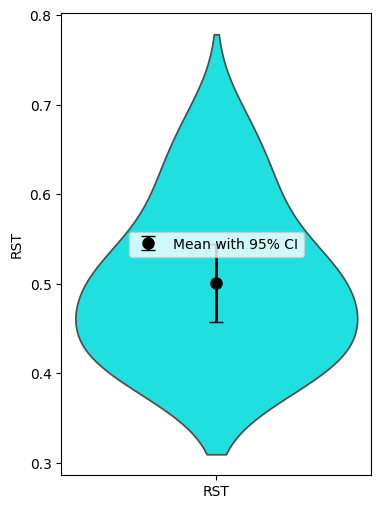

In [90]:
def plot_bar_ci(rst_array,group):
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    from scipy.stats import t
    
    
    # Calculate mean and standard error of the mean (SEM)
    mean_value = np.nanmean(rst_array)
    sem_value = np.nanstd(rst_array, ddof=1) / np.sqrt(np.sum(~np.isnan(rst_array)))
    
    # Calculate 95% confidence interval
    confidence_level = 0.95
    df = len(rst_array) - 1  # degrees of freedom
    ci_lower, ci_upper = t.interval(confidence_level, df, loc=mean_value, scale=sem_value)
    
    # Create a violin plot in grayscale
    plt.figure(figsize=(4, 6))
    # plt.figure(figsize=(8, 6))
    sns.violinplot(data=rst_array, width = 0.1, color='cyan', inner= None, density_norm='width')
    
    # Overlay the mean and 95% CI in grayscale
    plt.errorbar(0, mean_value, yerr=[[mean_value - ci_lower], [ci_upper - mean_value]], 
                 fmt='o', color='black', capsize=5, elinewidth=2, markersize=8, label='Mean with 95% CI')
    
    # Add labels and title
    plt.ylabel("RST")
    # plt.title("Violin Plot with Overlaid 95% CI as Error Bars")
    plt.xticks([0], [group])  # Set x-tick for single group
    
    # Show the plot
    plt.legend()
    plt.show()
plot_bar_ci(df_rst2['RST'],'RST')

In [91]:
from scipy.stats import ttest_1samp
rst_array = np.array(df_rst2['RST'])
# One-sample one-tailed t-test (alternative='greater')
t_stat, p_value = ttest_1samp(rst_array, 0.5)
# , alternative='greater'
# Calculating Cohen's d
mean_sample = np.mean(rst_array)
std_sample = np.std(rst_array, ddof=1)
cohens_d = (mean_sample - 0.5) / std_sample

# Degrees of freedom
df1 = len(rst_array) - 1

# Determining the direction of the mean difference
if p_value < 0.05:
    if mean_sample > 0.5:
        direction = "significantly higher"
    else:
        direction = "not significantly higher"  # This case should not happen with alternative='greater'
else:
    direction = "not significantly higher"

# Formatting the p-value for readability
if p_value < 0.001:
    p_value_formatted = "< 0.001"
else:
    p_value_formatted = f"{p_value:.3f}"

# Printing the results in the desired format
print(f"An independent sample two-tailed t-test was performed to compare the RST values against the null value of 0.5. "
      f"The mean RST (M = {mean_sample:.3f}, SD = {std_sample:.3f}) was "
      f"{direction} than the null value of 0.5; t({df1}) = {t_stat:.3f}, p = {p_value_formatted}. (Cohen's d:, {cohens_d:.3f})")

An independent sample two-tailed t-test was performed to compare the RST values against the null value of 0.5. The mean RST (M = 0.501, SD = 0.085) was not significantly higher than the null value of 0.5; t(16) = 0.053, p = 0.958. (Cohen's d:, 0.013)


In [87]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import numpy as np

# Load BayesFactor package from R
BayesFactor = importr("BayesFactor")

# Convert Python list to R numeric vector
data = np.array(df_rst['RST'])
r_data = robjects.FloatVector(data)

# Perform Bayesian one-sample t-test (H0: mean = 0.5)
bf_result = BayesFactor.ttestBF(x=r_data, mu=0.5)
print(bf_result)

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.04616136 ±0.49%

Against denominator:
  Null, mu = 0.5 
---
Bayes factor type: BFoneSample, JZS




In [92]:
import numpy as np
import matplotlib.pyplot as plt
from rpy2.robjects import FloatVector, r
from rpy2.robjects.packages import importr

# Load BayesFactor and extractBF
BayesFactor = importr("BayesFactor")
extractBF = r['extractBF']

data = np.array(df_rst2['RST'])  # Replace with your actual data
bf_values = []
sample_sizes = []

for n in range(5, len(data) + 1):
    sample = data[:n]

    # Skip constant data
    if np.std(sample, ddof=1) < 1e-8:
        print(f"Skipped n={n}: data are constant")
        bf_values.append(np.nan)
        continue

    try:
        r_sample = FloatVector(sample)
        bf = BayesFactor.ttestBF(x=r_sample, mu=0.5)

        # Use extractBF to get the numeric BF10 value
        bf_table = extractBF(bf)
        bf_numeric = float(bf_table.rx2('bf')[0])  # extract from R dataframe
        bf_values.append(bf_numeric)
        sample_sizes.append(n)

    except Exception as e:
        print(f"Error at n={n}: {e}")
        bf_values.append(np.nan)

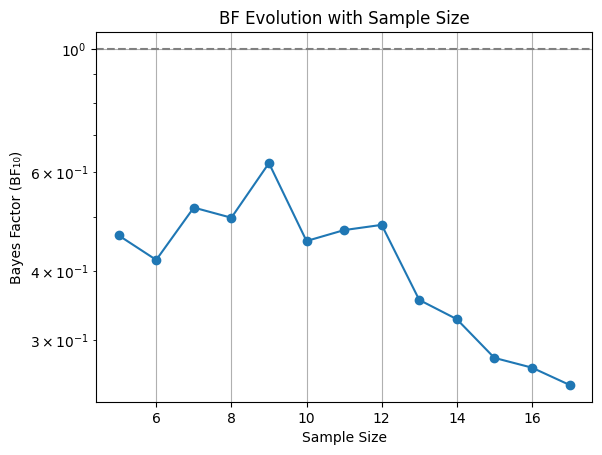

In [93]:
plt.plot(sample_sizes, bf_values, marker='o')
plt.axhline(1, color='gray', linestyle='--')
plt.yscale('log')
plt.xlabel("Sample Size")
plt.ylabel("Bayes Factor (BF₁₀)")
plt.title("BF Evolution with Sample Size")
plt.grid(True)
plt.show()

In [195]:
1/6

0.16666666666666666

In [123]:
def get_base_pair(row):
    arrangement = row['arrangement']
    target = row['target']

    if not isinstance(arrangement, str) or len(arrangement) != 3:
        return np.nan
    if target not in ['A', 'C']:
        return np.nan  # Only A or C can be target

    # Assign roles
    roles = {}
    roles[target] = 'T'
    roles['B'] = 'D'  # B is always decoy
    competitor = 'A' if target == 'C' else 'C'
    roles[competitor] = 'C'

    # Map the arrangement to roles (e.g., ACB → TCD)
    mapped = ''.join([roles.get(ch, '?') for ch in arrangement])

    # Extract base pair using first and last of mapped string
    first = mapped[0]
    last = mapped[-1]

    if '?' in [first, last]:
        return np.nan

    # Return alphabetically sorted base pair
    return ''.join(sorted([first, last]))

# **Applying it safely to a DataFrame**
def apply_base_pair(df):
    df = df.copy()
    df['BasePair'] = df.apply(get_base_pair, axis=1)
    return df

dfP = apply_base_pair(df_rst)
dfP

,currentTrial,FrameOrderLog,trial_type,trial,frame,duration,response,target,color,arrangement,...,B,userId,RST,T1,C1,D1,T2,C2,D2,BasePair
0,1,"[[8, 2, 21, 5, 17, 4, 22, 3, 9, 19, 12, 20, 1,...",main,1,0,663,A,C,Red,BCA,...,150,4214,0.340436,15,17,0,7,26,1,CD
1,2,"[[19, 13, 17, 3, 9, 18, 16, 23, 1, 10, 5, 4, 1...",main,2,0,812,A,C,Red,CAB,...,138,4214,0.340436,15,17,0,7,26,1,DT
2,3,"[[14, 13, 21, 5, 0, 18, 11, 10, 17, 15, 7, 1, ...",main,3,0,1054,C,A,Red,ACB,...,79,4214,0.340436,15,17,0,7,26,1,DT
3,4,"[[3, 14, 23, 20, 22, 2, 18, 1, 7, 8, 17, 5, 4,...",main,4,0,611,A,A,Red,CBA,...,84,4214,0.340436,15,17,0,7,26,1,CT
4,5,"[[12, 5, 4, 2, 18, 6, 7, 14, 8, 1, 21, 23, 3, ...",main,5,0,627,C,A,Red,CAB,...,82,4214,0.340436,15,17,0,7,26,1,CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,90,"[[14, 16, 1, 0, 10, 20, 8, 7, 22, 13, 9, 21, 3...",main,90,0,808,B,A,Red,CAB,...,72,8320,0.468750,21,11,3,9,23,1,CD
200,91,"[[12, 11, 21, 20, 16, 6, 17, 10, 8, 5, 1, 7, 1...",main,91,0,662,A,A,Red,CBA,...,95,8320,0.468750,21,11,3,9,23,1,CT
201,92,"[[4, 0, 17, 12, 22, 11, 3, 23, 19, 8, 13, 14, ...",main,92,0,939,A,A,Red,CBA,...,54,8320,0.468750,21,11,3,9,23,1,CT
202,93,"[[8, 18, 14, 7, 20, 6, 23, 19, 21, 5, 0, 9, 11...",main,93,0,2122,A,A,Red,ABC,...,80,8320,0.468750,21,11,3,9,23,1,CT


In [124]:
# # Apply the function separately to different subsets of the DataFrame
# df_rst = df.groupby(['userId']).apply(calculate_rst_ew).reset_index(drop=True)

# Apply the function separately to different subsets of the DataFrame
dfT_pair = dfP.groupby(['userId', 'BasePair']).apply(calculate_rst_ew).reset_index(drop=True)

T1: 5
C1: 4
D1: 0
T2: 2
C2: 8
D2: 0
T1: 6
C1: 6
D1: 0
T2: 1
C2: 11
D2: 0
T1: 4
C1: 7
D1: 0
T2: 4
C2: 7
D2: 1
T1: 9
C1: 3
D1: 0
T2: 2
C2: 10
D2: 0
T1: 4
C1: 7
D1: 1
T2: 1
C2: 9
D2: 1
T1: 4
C1: 8
D1: 0
T2: 1
C2: 10
D2: 0
T1: 4
C1: 6
D1: 1
T2: 1
C2: 10
D2: 0
T1: 7
C1: 5
D1: 0
T2: 3
C2: 8
D2: 0
T1: 10
C1: 0
D1: 2
T2: 5
C2: 5
D2: 1


/var/folders/kc/rbd8sj0d2q7bh_61jwm5hsf00000gn/T/ipykernel_4017/3820879129.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfT_pair = dfP.groupby(['userId', 'BasePair']).apply(calculate_rst_ew).reset_index(drop=True)


In [125]:
dfT_pair

,currentTrial,FrameOrderLog,trial_type,trial,frame,duration,response,target,color,arrangement,...,B,userId,RST,T1,C1,D1,T2,C2,D2,BasePair
0,1,"[[8, 2, 21, 5, 17, 4, 22, 3, 9, 19, 12, 20, 1,...",main,1,0,663,A,C,Red,BCA,...,150,4214,0.377778,5,4,0,2,8,0,CD
1,5,"[[12, 5, 4, 2, 18, 6, 7, 14, 8, 1, 21, 23, 3, ...",main,5,0,627,C,A,Red,CAB,...,82,4214,0.377778,5,4,0,2,8,0,CD
2,8,"[[21, 14, 23, 6, 12, 11, 7, 15, 13, 19, 2, 17,...",main,8,0,541,A,A,Red,BAC,...,68,4214,0.377778,5,4,0,2,8,0,CD
3,20,"[[15, 6, 19, 13, 2, 16, 18, 9, 20, 21, 3, 10, ...",main,20,0,587,C,C,Red,BCA,...,159,4214,0.377778,5,4,0,2,8,0,CD
4,22,"[[19, 2, 11, 6, 17, 14, 10, 21, 0, 9, 7, 18, 1...",main,22,0,612,A,C,Red,ACB,...,129,4214,0.377778,5,4,0,2,8,0,CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,63,"[[2, 10, 9, 1, 23, 0, 15, 21, 8, 12, 13, 4, 11...",main,63,0,787,A,A,Red,BCA,...,102,8320,0.750000,10,0,2,5,5,1,DT
200,67,"[[10, 15, 4, 13, 2, 20, 3, 22, 7, 9, 18, 21, 0...",main,67,0,896,A,A,Red,BCA,...,77,8320,0.750000,10,0,2,5,5,1,DT
201,72,"[[23, 8, 5, 15, 7, 6, 22, 12, 3, 4, 16, 21, 14...",main,72,0,832,A,C,Red,BAC,...,124,8320,0.750000,10,0,2,5,5,1,DT
202,77,"[[1, 14, 3, 13, 8, 6, 17, 12, 23, 19, 22, 18, ...",main,77,0,1132,A,C,Red,CAB,...,137,8320,0.750000,10,0,2,5,5,1,DT


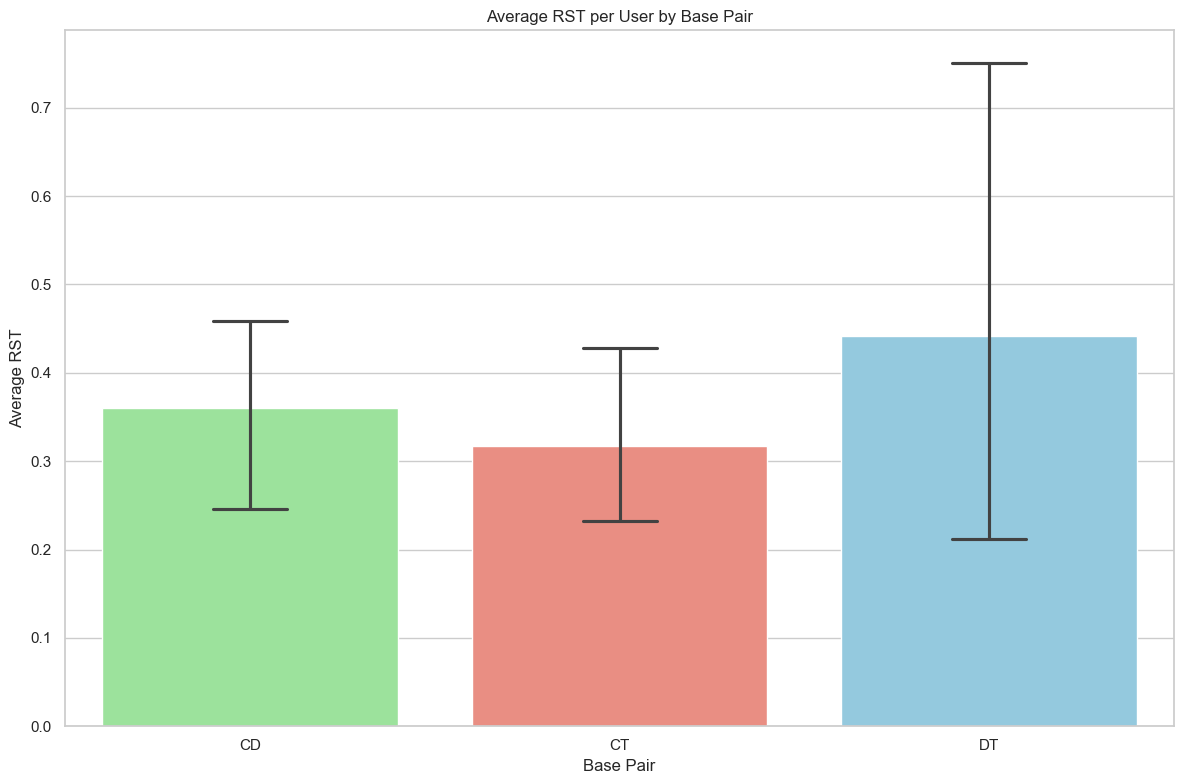

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set style and apply custom color palette
custom_palette = ['lightgreen', 'salmon', 'skyblue']
sns.set_theme(style='whitegrid')
sns.set_palette(custom_palette)

# Calculate the mean RST per user per Salient_Pair
dfT_agg = dfT_pair.groupby(['userId', 'BasePair'])['RST'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Plot using Seaborn barplot
sns.barplot(
    data=dfT_agg,
    x='BasePair',
    y='RST',
    hue='BasePair',
    legend = False,
    errorbar=('ci', 95),  # Add 95% confidence interval bars if needed
    capsize=0.2,  # Adds caps to the error bars
    palette = custom_palette
)

# Label the plot
plt.title('Average RST per User by Base Pair')
plt.xlabel('Base Pair')
plt.ylabel('Average RST')
# plt.legend(title='User ID', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot for clarity
plt.xticks()  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

In [63]:
df_rst.columns

Index(['currentTrial', 'target', 'competitor', 'D1', 'D2', 'A1', 'A2', 'B1',
       'B2', 'target_type', 'trial_type', 'order', 'y1', 'y2', 'y3',
       'duration', 'response', 'userId', 'BasePair', 'RST', 'T1', 'C1', 'T2',
       'C2'],
      dtype='object')

In [64]:
# Check for NaN or blank (empty string) values
missing_duration = df_rst[df_rst['duration'].isna() | (df_rst['duration'].astype(str).str.strip() == '')]

# Print the rows with missing durations
print("Rows with missing or blank durations:")
print(missing_duration)

Rows with missing or blank durations:
Empty DataFrame
Columns: [currentTrial, target, competitor, D1, D2, A1, A2, B1, B2, target_type, trial_type, order, y1, y2, y3, duration, response, userId, BasePair, RST, T1, C1, T2, C2]
Index: []

[0 rows x 24 columns]


In [65]:
df_rst

,currentTrial,target,competitor,D1,D2,A1,A2,B1,B2,target_type,...,y3,duration,response,userId,BasePair,RST,T1,C1,T2,C2
0,0,A,B,0,0,175,248,248,175,W,...,-12,8998,C,0210,DT,0.471429,27,43,39,31
1,1,B,A,0,0,169,248,248,169,N,...,2,6843,T,0210,DT,0.471429,27,43,39,31
2,2,B,A,0,0,174,250,250,174,N,...,5,4027,T,0210,DT,0.471429,27,43,39,31
3,3,B,A,0,0,173,251,251,173,N,...,-10,11573,C,0210,CD,0.471429,27,43,39,31
4,4,B,A,0,0,176,252,252,176,N,...,-7,3509,T,0210,DT,0.471429,27,43,39,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9160,157,B,A,5,7,166,248,248,166,N,...,-1,1714,T,9868,CD,0.519035,19,46,44,15
9161,158,A,B,5,7,173,250,250,173,W,...,0,845,C,9868,DT,0.519035,19,46,44,15
9162,159,B,A,5,7,169,248,248,169,N,...,2,939,C,9868,DT,0.519035,19,46,44,15
9163,160,B,A,5,7,173,241,241,173,N,...,12,1457,T,9868,DT,0.519035,19,46,44,15


In [66]:
# Convert duration to numeric (if needed)
df_rst['duration'] = pd.to_numeric(df_rst['duration'], errors='coerce')

# Create new column 'RT' with the user's mean duration
df_rst['RT'] = df_rst.groupby('userId')['duration'].transform('mean')

In [67]:
# df_rst['RT'] = df_rst.groupby(['userId'])['duration'].mean().reset_index()

In [68]:
df_rst = df_rst[['userId', 'RST', 'RT']].drop_duplicates()

In [69]:
df_rst

,userId,RST,RT
0,0210,0.471429,4838.528571
140,0261,0.411979,1548.852941
276,0641,0.508333,2000.961240
405,0687,0.487455,977.460432
544,0705,0.436620,1786.153846
...,...,...,...
8484,9628,0.464309,1693.992754
8622,9664,0.521049,1752.364964
8759,9677,0.511885,1064.189781
8896,9755,0.503551,2335.954887


In [70]:
df_rst['RT'].mean(), df_rst['RT'].std()

(2148.678914579217, 1769.8091691691307)

In [71]:
df_rst.to_csv('rec_triplet_22April25.csv', index=False)

In [37]:
# df_rst.to_csv('rec_triplet_18April25.csv', index=False)

In [115]:
# df_rst.to_csv('tod_low_sv_31Jan25.csv', index=False)

In [73]:
def plot_bar_ci(rst_array,group):
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    from scipy.stats import t
    
    
    # Calculate mean and standard error of the mean (SEM)
    mean_value = np.nanmean(rst_array)
    sem_value = np.nanstd(rst_array, ddof=1) / np.sqrt(np.sum(~np.isnan(rst_array)))
    
    # Calculate 95% confidence interval
    confidence_level = 0.95
    df = len(rst_array) - 1  # degrees of freedom
    ci_lower, ci_upper = t.interval(confidence_level, df, loc=mean_value, scale=sem_value)
    
    # Create a violin plot in grayscale
    plt.figure(figsize=(4, 6))
    # plt.figure(figsize=(8, 6))
    sns.violinplot(data=rst_array, width = 0.1, color='cyan', inner= None, density_norm='width')
    
    # Overlay the mean and 95% CI in grayscale
    plt.errorbar(0, mean_value, yerr=[[mean_value - ci_lower], [ci_upper - mean_value]], 
                 fmt='o', color='black', capsize=5, elinewidth=2, markersize=8, label='Mean with 95% CI')
    
    # Add labels and title
    plt.ylabel("RST")
    # plt.title("Violin Plot with Overlaid 95% CI as Error Bars")
    plt.xticks([0], [group])  # Set x-tick for single group
    
    # Show the plot
    plt.legend()
    plt.show()

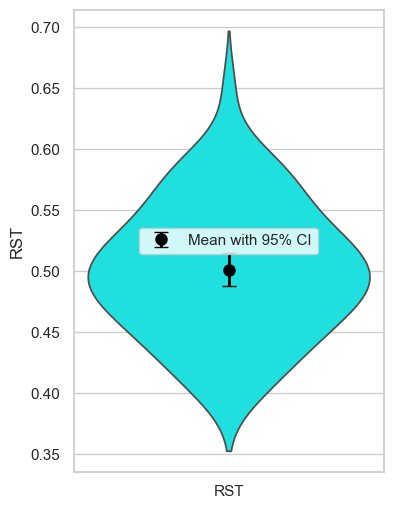

In [74]:
plot_bar_ci(df_rst['RST'],'RST')

In [75]:
from scipy import stats
t_stat, p_value = stats.ttest_1samp(np.array(df_rst['RST']),0.5)
t_stat, p_value

(0.22399126689817608, 0.8234457248482687)

In [76]:
mean_sample = np.mean(data)
std_sample = np.std(data, ddof=1)
cohens_d = (mean_sample - 0.5) / std_sample
cohens_d

TypeError: unsupported operand type(s) for /: 'dict' and 'int'

In [80]:
from scipy.stats import ttest_1samp
rst_array = np.array(df_rst['RST'])
# One-sample one-tailed t-test (alternative='greater')
t_stat, p_value = ttest_1samp(rst_array, 0.5)
# , alternative='greater'
# Calculating Cohen's d
mean_sample = np.mean(rst_array)
std_sample = np.std(rst_array, ddof=1)
cohens_d = (mean_sample - 0.5) / std_sample

# Degrees of freedom
df1 = len(rst_array) - 1

# Determining the direction of the mean difference
if p_value < 0.05:
    if mean_sample > 0.5:
        direction = "significantly higher"
    else:
        direction = "not significantly higher"  # This case should not happen with alternative='greater'
else:
    direction = "not significantly higher"

# Formatting the p-value for readability
if p_value < 0.001:
    p_value_formatted = "< 0.001"
else:
    p_value_formatted = f"{p_value:.3f}"

# Printing the results in the desired format
print(f"An independent sample two-tailed t-test was performed to compare the RST values against the null value of 0.5. "
      f"The mean RST (M = {mean_sample:.3f}, SD = {std_sample:.3f}) was "
      f"{direction} than the null value of 0.5; t({df1}) = {t_stat:.3f}, p = {p_value_formatted}. (Cohen's d:, {cohens_d:.3f})")

An independent sample two-tailed t-test was performed to compare the RST values against the null value of 0.5. The mean RST (M = 0.501, SD = 0.054) was not significantly higher than the null value of 0.5; t(67) = 0.224, p = 0.823. (Cohen's d:, 0.027)


In [77]:
# pip install rpy2

In [78]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import numpy as np

# Load BayesFactor package from R
BayesFactor = importr("BayesFactor")

# Convert Python list to R numeric vector
data = np.array(df_rst['RST'])
r_data = robjects.FloatVector(data)

# Perform Bayesian one-sample t-test (H0: mean = 0.5)
bf_result = BayesFactor.ttestBF(x=r_data, mu=0.5)
print(bf_result)

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.1363752 ±0.1%

Against denominator:
  Null, mu = 0.5 
---
Bayes factor type: BFoneSample, JZS




In [81]:
1/0.1363752

7.332711519396488

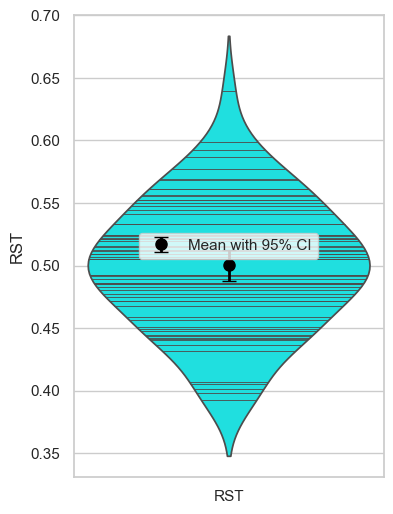

In [31]:
plot_bar_ci(df_rst['RST'],'RST')

In [22]:
df.columns

Index(['currentTrial', 'target', 'competitor', 'D1', 'D2', 'A1', 'A2', 'B1',
       'B2', 'target_type', 'trial_type', 'order', 'y1', 'y2', 'y3',
       'duration', 'response', 'userId', 'BasePair'],
      dtype='object')

In [25]:
dfT_pair.groupby('userId')['target_type'].value_counts()

userId  target_type
0210    N              72
        W              72
0641    N              72
        W              72
0687    N              72
                       ..
9755    W              72
9868    N              72
        W              72
uhan    N              72
        W              72
Name: count, Length: 104, dtype: int64

In [26]:
df.groupby(['userId','target_type'])['response'].value_counts()

userId  target_type  response
0210    N            T           40
                     C           32
        W            T           45
                     C           44
                     D            1
                                 ..
uhan    N            T           64
                     C            4
                     D            4
        W            C           60
                     T           30
Name: count, Length: 293, dtype: int64

In [27]:
df_catch.groupby(['userId'])['response'].value_counts()

NameError: name 'df_catch' is not defined

In [38]:
df[df['trial_type']=='catch']

,currentTrial,target,competitor,D1,D2,A1,A2,B1,B2,target_type,...,y1,y2,duration,response,userId,RST,T1,C1,T2,C2


In [18]:
#Few users have data in a different format
# Function to determine 'stim_type'
def update_stim_type(row):
    if pd.isna(row['stim_type']):
        # Condition 1: Check if any value in 'stimulus' is None
        if any(x is None for x in row['stimulus']):
            stim_type = 'rectangle'
        else:
            stim_type = 'star'
    else:
        stim_type = row['stim_type']  # Preserve if not NaN
    
    # Condition 2: Override if 'trial_type' is 'catch'
    if row['trial_type'] == 'catch':
        stim_type = 'catch'
    
    return stim_type

# Apply the function to each row in the DataFrame
all_data['stimulus_type'] = all_data.apply(update_stim_type, axis=1)


In [19]:
def format_data(row):
    # Format 'formatted_pos' based on 'stim_pos' and 'pair'
    if row['pair'] == 'TD':
        row['formatted_pos'] = 'TD' if row['stim_pos'] == ['A', 'B'] else 'DT'
    elif row['pair'] == 'CD':
        row['formatted_pos'] = 'CD' if row['stim_pos'] == ['A', 'B'] else 'DC'
    
    # Format 'formatted_response' irrespective of stim_pos
    if row['pair'] == 'TD':
        row['formatted_response'] = 'T' if row['response'] == 'A' else 'D'
    elif row['pair'] == 'CD':
        row['formatted_response'] = 'C' if row['response'] == 'A' else 'D'
    
    # Format 'formatted_target' (it should never be 'D')
    row['formatted_target'] = 'T' if row['pair'] == 'TD' else 'C'
    
    return row

# Apply the function to each row in the DataFrame
all_data = all_data.apply(format_data, axis=1)

# Output the transformed DataFrame
all_data[["userId",'stimulus_type', 'currentTrial','pair', 'formatted_pos', 'formatted_response', 'formatted_target','difficulty', 'duration' ]]

,userId,stimulus_type,currentTrial,pair,formatted_pos,formatted_response,formatted_target,difficulty,duration
0,8857,catch,0,TD,DT,T,T,2,9867
1,8857,rectangle,1,CD,DC,C,C,5,22490
2,8857,star,2,TD,TD,T,T,3,6087
3,8857,star,3,CD,DC,C,C,5,13819
4,8857,rectangle,4,TD,DT,T,T,3,3427
...,...,...,...,...,...,...,...,...,...
2817,1729,catch,55,CD,DC,C,C,4,776
2818,1729,catch,56,CD,DC,C,C,4,948
2819,1729,rectangle,57,CD,CD,C,C,4,1029
2820,1729,catch,58,TD,DT,T,T,5,789


In [28]:
def remove_low_performers(all_data, threshold=0.75):
    # Step 1: Create a new column 'correct' to check if formatted_response == formatted_target
    all_data['correct'] = all_data['formatted_response'] == all_data['formatted_target']
    
    # Step 2: Filter for rows where stimulus_type is 'catch'
    catch_trials = all_data[all_data['stimulus_type'] == 'catch']

    # Step 3: Group by userId and calculate performance
    performance_summary = catch_trials.groupby('userId').agg(
        total_trials=('correct', 'size'),           # Total catch trials for each user
        correct_trials=('correct', 'sum')           # Number of correct responses
    ).reset_index()

    # Step 4: Calculate accuracy for each user
    performance_summary['accuracy'] = performance_summary['correct_trials'] / performance_summary['total_trials']

    # Step 5: Identify users with performance below the threshold
    low_performers = performance_summary[performance_summary['accuracy'] < threshold]['userId']

    # Step 6: Count the number of low-performing users
    num_removed = len(low_performers)

    # Step 7: Remove low-performing users from all_data
    all_data_filtered = all_data[~all_data['userId'].isin(low_performers)]

    # Step 8: Remove rows with stimulus_type == 'catch'
    all_data_filtered = all_data_filtered[all_data_filtered['stimulus_type'] != 'catch']

    # Step 9: Remove the 'stim_type' column
    all_data_filtered = all_data_filtered.drop(columns=['stim_type'])

    # Step 10: Return the filtered data, number of removed users, and the removed user IDs
    return all_data_filtered, num_removed, low_performers.tolist()

# Usage
all_data_filtered, num_removed, removed_user_ids = remove_low_performers(all_data)

# Output the number of users removed and their IDs
print(f'Number of users removed: {num_removed}')
print(f'Removed user IDs: {removed_user_ids}')

KeyError: 'formatted_response'

In [21]:
df = all_data_filtered.copy()
df['correct'] = df['correct'].astype(float)  # Convert boolean to float (0 or 1) for mean calculation

In [22]:
df

,currentTrial,stimulus,stim_pos,trial_type,duration,response,difficulty,pair,target,comp,target_type,userId,stimulus_type,formatted_pos,formatted_response,formatted_target,correct
1,1,"[168, 216, 237, 168, None]","[B, A]",range,22490,A,5,CD,A,B,W,8857,rectangle,DC,C,C,1.0
2,2,"[178, 42, 163, 42, 204]","[A, B]",freq,6087,A,3,TD,A,B,W,8857,star,TD,T,T,1.0
3,3,"[189, 50, 127, 13, 205]","[B, A]",range,13819,A,5,CD,A,B,W,8857,star,DC,C,C,1.0
4,4,"[232, 159, 245, 172, None]","[B, A]",rf,3427,A,3,TD,B,A,N,8857,rectangle,DT,T,T,1.0
5,5,"[248, 170, 145, 248, None]","[A, B]",freq,20540,A,5,CD,A,B,W,8857,rectangle,CD,C,C,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2812,50,"[188, 40, 135, 21, 209]","[A, B]",freq,1408,A,4,CD,B,A,N,1729,star,CD,C,C,1.0
2814,52,"[169, 39, 133, 14, 193]","[B, A]",rf,1218,B,4,CD,A,B,W,1729,star,DC,D,C,0.0
2816,54,"[188, 40, 173, 40, 209]","[A, B]",freq,2286,A,3,TD,A,B,W,1729,star,TD,T,T,1.0
2819,57,"[172, 245, 232, 159, None]","[A, B]",rf,1029,A,4,CD,B,A,N,1729,rectangle,CD,C,C,1.0


In [23]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
# Ensure 'duration' and 'difficulty' are numeric
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
df['difficulty'] = pd.to_numeric(df['difficulty'], errors='coerce')
def compute_userwise_accuracy_rt_diff(data):
    """
    Compute user-wise accuracy and average reaction time (RT) for each condition.
    Returns the summarized DataFrame, ANOVA results with p-values and effect sizes.
    
    Parameters:
    - data: DataFrame containing the relevant columns.

    Returns:
    - user_summary: DataFrame with user-wise accuracy and RT
    - accuracy_anova_results: ANOVA results for accuracy
    - accuracy_effect_sizes: Dictionary of effect sizes for accuracy ANOVA
    - rt_anova_results: ANOVA results for reaction time
    - rt_effect_sizes: Dictionary of effect sizes for RT ANOVA
    """
    # Calculate whether the response was correct
#     data['correct'] = data['formatted_response'] == data['formatted_target']

    # Compute user-wise accuracy and average RT
    user_summary = data.groupby(['userId', 'stimulus_type', 'pair']).agg(
        accuracy=('correct', 'mean'),
        avg_rt=('duration', 'mean'),
        avg_difficulty = ('difficulty', 'mean')
    ).reset_index()

    # Run Repeated Measures ANOVA for accuracy
    accuracy_model = AnovaRM(user_summary, 'accuracy', 'userId', within=['stimulus_type', 'pair'])
    accuracy_anova_results = accuracy_model.fit()

    # Calculate effect size for accuracy (Partial Eta Squared)
    accuracy_anova_table = accuracy_anova_results.anova_table
    accuracy_effect_sizes = {}
    
    # Extract sum of squares from ANOVA results for effect size calculation
    total_sum_sq = accuracy_anova_table['F Value'] * accuracy_anova_table['Num DF'] + accuracy_anova_table['Num DF'].sum()
    
    for source in accuracy_anova_table.index:
        if source in accuracy_anova_table.index:
            ss_effect = accuracy_anova_table.loc[source, 'F Value'] * accuracy_anova_table.loc[source, 'Num DF']
            eta_sq = ss_effect / total_sum_sq
            accuracy_effect_sizes[source] = eta_sq
            
    # Run Repeated Measures ANOVA for RT
    rt_model = AnovaRM(user_summary, 'avg_rt', 'userId', within=['stimulus_type', 'pair'])
    rt_anova_results = rt_model.fit()

    # Calculate effect size for RT (Partial Eta Squared)
    rt_anova_table = rt_anova_results.anova_table
    rt_effect_sizes = {}
    
    # Extract sum of squares from ANOVA results for effect size calculation
    total_sum_sq_rt = rt_anova_table['F Value'] * rt_anova_table['Num DF'] + rt_anova_table['Num DF'].sum()
    
    for source in rt_anova_table.index:
        if source in rt_anova_table.index:
            ss_effect = rt_anova_table.loc[source, 'F Value'] * rt_anova_table.loc[source, 'Num DF']
            eta_sq = ss_effect / total_sum_sq_rt
            rt_effect_sizes[source] = eta_sq
            
    # Run Repeated Measures ANOVA for difficulty
    difficulty_model = AnovaRM(user_summary, 'avg_difficulty', 'userId', within=['stimulus_type', 'pair'])
    difficulty_anova_results = difficulty_model.fit()

    # Calculate effect size for avg_difficulty (Partial Eta Squared)
    difficulty_anova_table = difficulty_anova_results.anova_table
    difficulty_effect_sizes = {}
    
    # Extract sum of squares from ANOVA results for effect size calculation
    total_sum_sq_diff = difficulty_anova_table['F Value'] * difficulty_anova_table['Num DF'] + difficulty_anova_table['Num DF'].sum()
    
    for source in difficulty_anova_table.index:
        if source in difficulty_anova_table.index:
            ss_effect = difficulty_anova_table.loc[source, 'F Value'] * difficulty_anova_table.loc[source, 'Num DF']
            eta_sq = ss_effect / total_sum_sq_diff
            difficulty_effect_sizes[source] = eta_sq

    return user_summary, accuracy_anova_results, accuracy_effect_sizes, rt_anova_results, rt_effect_sizes, difficulty_anova_results, difficulty_effect_sizes

In [24]:
# Example usage
user_summary, accuracy_anova_results, accuracy_effect_sizes, rt_anova_results, rt_effect_sizes,difficulty_anova_results, difficulty_effect_sizes = compute_userwise_accuracy_rt_diff(df)

In [25]:
# Function to report ANOVA results in a formatted way
def report_anova_results(anova_results, effect_sizes=None):
    """
    Report ANOVA results in a formatted way.
    
    Parameters:
    - anova_results: ANOVA results object with F-statistics and p-values.
    - effect_sizes: Dictionary of effect sizes for the results.
    
    Returns:
    - None; prints the formatted results.
    """
    
    # Extract the ANOVA table
    anova_table = anova_results.anova_table
    print(anova_table)
    # Iterate through each source in the ANOVA results
    for source in anova_table.index:
        # Extract relevant statistics
        df = anova_table.loc[source, 'Num DF']
        f_stat = anova_table.loc[source, 'F Value']
        p_value = anova_table.loc[source, 'Pr > F']

        # Formatting the p-value for readability
        if p_value < 0.001:
            p_value_formatted = "< 0.001"
        else:
            p_value_formatted = f"{p_value:.3f}"

        # Get the corresponding effect size
        if effect_sizes is not None and source in effect_sizes:
            # Extract the specific value for the effect size
            effect_size = effect_sizes[source][source]  # Selects the relevant index for η²
            
            print(f"ANOVA for {source}: F({df}) = {f_stat:.3f}, p = {p_value_formatted}. Effect size: η² = {effect_size:.3f}.")
        else:
    #         print(f"ANOVA for {source}: F({df}) = {f_stat:.3f}, p = {p_value_formatted}. (No effect size available)")
            print(f"ANOVA for {source}: F({df}) = {f_stat:.3f}, p = {p_value_formatted}.")


In [26]:
# Example usage
print("\nRepeated Measures ANOVA results for Accuracy:")
report_anova_results(accuracy_anova_results, accuracy_effect_sizes)

print("\nRepeated Measures ANOVA results for Reaction Time:")
report_anova_results(rt_anova_results, rt_effect_sizes)

print("\nRepeated Measures ANOVA results for Difficulty Rating:")
report_anova_results(difficulty_anova_results, difficulty_effect_sizes)


Repeated Measures ANOVA results for Accuracy:
                      F Value  Num DF  Den DF    Pr > F
stimulus_type       12.054930     1.0    42.0  0.001210
pair                32.268556     1.0    42.0  0.000001
stimulus_type:pair   6.646233     1.0    42.0  0.013534
ANOVA for stimulus_type: F(1.0) = 12.055, p = 0.001. Effect size: η² = 0.801.
ANOVA for pair: F(1.0) = 32.269, p = < 0.001. Effect size: η² = 0.915.
ANOVA for stimulus_type:pair: F(1.0) = 6.646, p = 0.014. Effect size: η² = 0.689.

Repeated Measures ANOVA results for Reaction Time:
                     F Value  Num DF  Den DF    Pr > F
stimulus_type       8.199247     1.0    42.0  0.006513
pair                4.452781     1.0    42.0  0.040842
stimulus_type:pair  1.874282     1.0    42.0  0.178263
ANOVA for stimulus_type: F(1.0) = 8.199, p = 0.007. Effect size: η² = 0.732.
ANOVA for pair: F(1.0) = 4.453, p = 0.041. Effect size: η² = 0.597.
ANOVA for stimulus_type:pair: F(1.0) = 1.874, p = 0.178. Effect size: η² = 0.385.

# Step 2: Plot the Delta Values for Each Dependent Variable


In [27]:
df

,currentTrial,stimulus,stim_pos,trial_type,duration,response,difficulty,pair,target,comp,target_type,userId,stimulus_type,formatted_pos,formatted_response,formatted_target,correct
1,1,"[168, 216, 237, 168, None]","[B, A]",range,22490,A,5,CD,A,B,W,8857,rectangle,DC,C,C,1.0
2,2,"[178, 42, 163, 42, 204]","[A, B]",freq,6087,A,3,TD,A,B,W,8857,star,TD,T,T,1.0
3,3,"[189, 50, 127, 13, 205]","[B, A]",range,13819,A,5,CD,A,B,W,8857,star,DC,C,C,1.0
4,4,"[232, 159, 245, 172, None]","[B, A]",rf,3427,A,3,TD,B,A,N,8857,rectangle,DT,T,T,1.0
5,5,"[248, 170, 145, 248, None]","[A, B]",freq,20540,A,5,CD,A,B,W,8857,rectangle,CD,C,C,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2812,50,"[188, 40, 135, 21, 209]","[A, B]",freq,1408,A,4,CD,B,A,N,1729,star,CD,C,C,1.0
2814,52,"[169, 39, 133, 14, 193]","[B, A]",rf,1218,B,4,CD,A,B,W,1729,star,DC,D,C,0.0
2816,54,"[188, 40, 173, 40, 209]","[A, B]",freq,2286,A,3,TD,A,B,W,1729,star,TD,T,T,1.0
2819,57,"[172, 245, 232, 159, None]","[A, B]",rf,1029,A,4,CD,B,A,N,1729,rectangle,CD,C,C,1.0


In [28]:
# Compute user-wise accuracy and average RT
user_summary = df.groupby(['userId', 'stimulus_type', 'pair']).agg(
    accuracy=('correct', 'mean'),
    avg_reaction_time=('duration', 'mean'),
    avg_difficulty = ('difficulty', 'mean')
).reset_index()
df1 = user_summary.copy()

In [29]:
df1

,userId,stimulus_type,pair,accuracy,avg_reaction_time,avg_difficulty
0,0017,rectangle,CD,0.916667,2457.583333,2.083333
1,0017,rectangle,TD,0.833333,1547.333333,1.750000
2,0017,star,CD,0.750000,2650.166667,1.500000
3,0017,star,TD,1.000000,1609.000000,1.666667
4,0373,rectangle,CD,0.833333,3681.416667,4.416667
...,...,...,...,...,...,...
167,9628,star,TD,1.000000,2415.416667,4.500000
168,9880,rectangle,CD,0.416667,7728.166667,5.000000
169,9880,rectangle,TD,0.416667,6774.000000,4.500000
170,9880,star,CD,0.666667,16412.250000,5.500000


In [30]:
# Save DataFrame to CSV file
# df1.to_csv('tod_rating_pair_5thNOv.csv', index=False)

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem


# # Step 0: Ensure DVs are numeric
# df['accuracy'] = pd.to_numeric(df['accuracy'], errors='coerce')
# df['avg_reaction_time'] = pd.to_numeric(df['avg_reaction_time'], errors='coerce')
# df['avg_difficulty'] = pd.to_numeric(df['avg_difficulty'], errors='coerce')

# # Step 1: Group by userId, pair, and stimulus_type, then compute means for each DV
# df_cleaned = df.dropna(subset=['accuracy', 'avg_reaction_time', 'avg_difficulty'])
# df_grouped = df_cleaned.groupby(['userId', 'pair', 'stimulus_type'])[['accuracy', 'avg_reaction_time', 'avg_difficulty']].mean().reset_index()

# Step 2: Pivot the table to get separate columns for each combination of pair and stimulus_type
delta_df = df1.pivot(index='userId', columns=['pair', 'stimulus_type'], values=['accuracy', 'avg_reaction_time', 'avg_difficulty'])

# Flatten the columns after pivoting to make them single-level
delta_df.columns = ['_'.join(map(str, col)).strip() for col in delta_df.columns.values]

# Step 3: Calculate delta values between CD and TD for each stimulus type
delta_df['delta_accuracy_rectangle'] = delta_df['accuracy_CD_rectangle'] - delta_df['accuracy_TD_rectangle']
delta_df['delta_accuracy_star'] = delta_df['accuracy_CD_star'] - delta_df['accuracy_TD_star']
delta_df['delta_reaction_time_rectangle'] = delta_df['avg_reaction_time_CD_rectangle'] - delta_df['avg_reaction_time_TD_rectangle']
delta_df['delta_reaction_time_star'] = delta_df['avg_reaction_time_CD_star'] - delta_df['avg_reaction_time_TD_star']
delta_df['delta_difficulty_rectangle'] = delta_df['avg_difficulty_CD_rectangle'] - delta_df['avg_difficulty_TD_rectangle']
delta_df['delta_difficulty_star'] = delta_df['avg_difficulty_CD_star'] - delta_df['avg_difficulty_TD_star']

# # Step 4: Prepare data in long format for plotting
# delta_long = delta_df[['delta_accuracy_rectangle', 'delta_accuracy_star', 'delta_reaction_time_rectangle', 'delta_reaction_time_star', 
#                        'delta_difficulty_rectangle', 'delta_difficulty_star']].reset_index()
# delta_long = delta_long.melt(id_vars='userId', var_name='Condition', value_name='Delta')

# # Extract DV and stimulus type for easier plotting
# delta_long['DV'] = delta_long['Condition'].str.extract(r'delta_(.*?)_')[0]
# delta_long['Stimulus_Type'] = delta_long['Condition'].str.extract(r'_(rectangle|star)')[0]

# # Custom y-axis limits for each DV based on actual data range
# y_limits = {
#     'accuracy': (-0.1, 0.1),
#     'reaction_time': (-5000, 5000),
#     'difficulty': (-1, 1)
# }

# # Step 5: Plot each DV separately with the mean and standard error bars for each stimulus type
# fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# for i, dv in enumerate(['accuracy', 'reaction_time', 'difficulty']):
#     dv_data = delta_long[delta_long['DV'] == dv]
    
#     # Calculate mean and standard error for each stimulus type
#     means = dv_data.groupby('Stimulus_Type')['Delta'].mean()
#     errors = dv_data.groupby('Stimulus_Type')['Delta'].apply(sem)  # Standard error of the mean

#     # Plot
#     axes[i].bar(means.index, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'], alpha=0.7)
#     axes[i].set_ylim(y_limits[dv])  # Set custom y-limits for each DV
#     axes[i].set_title(f"Delta {dv.capitalize()} by Stimulus Type")
#     axes[i].set_ylabel(f"Delta {dv.capitalize()} (CD - TD)")
#     axes[i].set_xlabel("Stimulus Type")
#     axes[i].axhline(0, color='gray', linestyle='--')  # Add a reference line at y=0

# plt.tight_layout()
# plt.show()


In [95]:
# Step 4: Prepare data in long format for plotting
delta_long = delta_df[['delta_accuracy_rectangle', 'delta_accuracy_star', 
                       'delta_reaction_time_rectangle', 'delta_reaction_time_star', 
                       'delta_difficulty_rectangle', 'delta_difficulty_star']].reset_index()

# Melt the DataFrame
delta_long = delta_long.melt(id_vars='userId', var_name='Condition', value_name='Delta')

# Extract DV and stimulus type for easier plotting, updated regex
delta_long['DV'] = delta_long['Condition'].str.extract(r'delta_(.*?)(?:_rectangle|_star)')[0]
delta_long['Stimulus_Type'] = delta_long['Condition'].str.extract(r'_(rectangle|star)')[0]


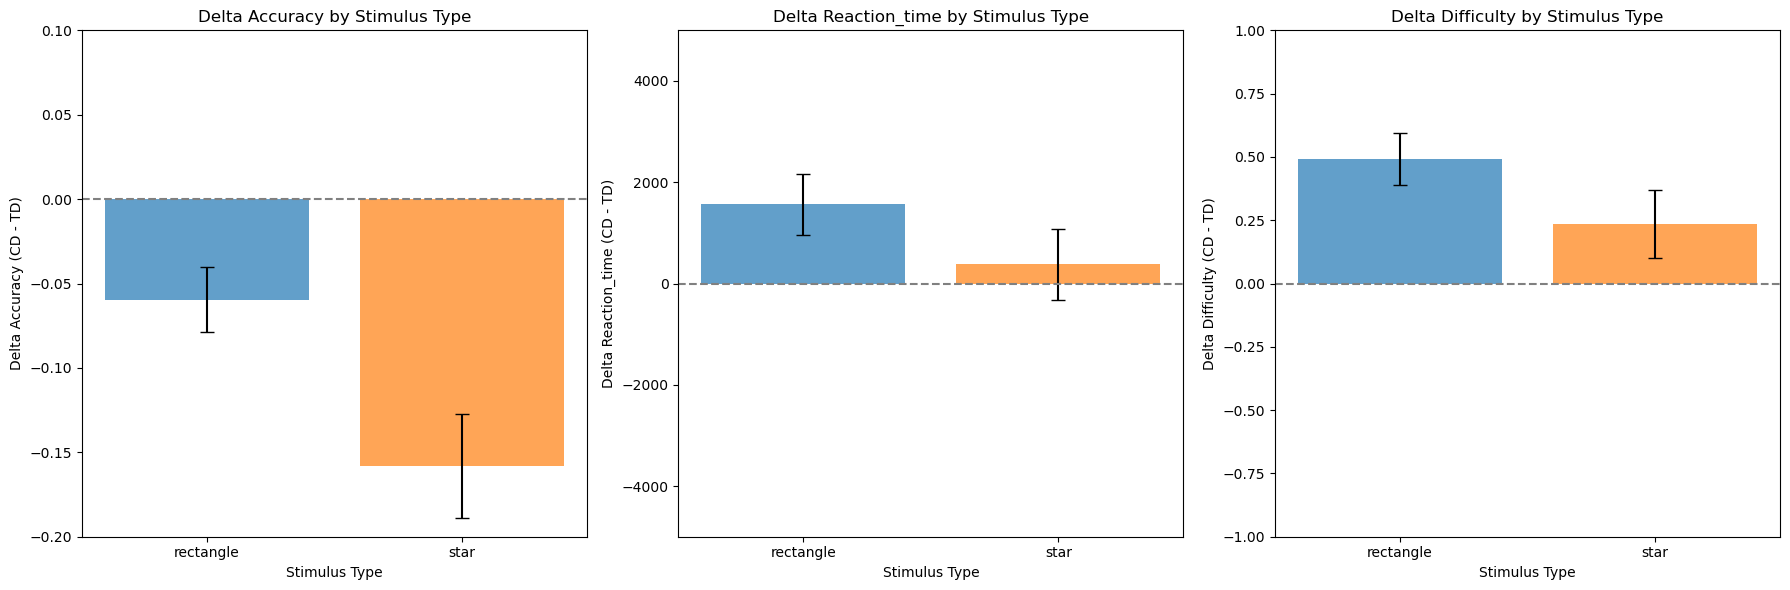

In [96]:
# Updated plotting code with adjustments for y-axis range and error bar visibility

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Custom y-axis limits updated based on feedback
y_limits = {
    'accuracy': (-0.2, 0.1),       # Expanded for visibility of "star" error bars
    'reaction_time': (-5000, 5000),  # Default range for reaction time
    'difficulty': (-1, 1)          # Range for difficulty
}

for i, dv in enumerate(['accuracy', 'reaction_time', 'difficulty']):
    dv_data = delta_long[delta_long['DV'] == dv]
    
    # Calculate mean and standard error for each stimulus type
    means = dv_data.groupby('Stimulus_Type')['Delta'].mean()
    errors = dv_data.groupby('Stimulus_Type')['Delta'].apply(sem)  # Standard error of the mean

    # Plot
    axes[i].bar(means.index, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'], alpha=0.7)
    
    # Adjust y-limits to ensure error bars are visible
    axes[i].set_ylim(y_limits[dv])
    axes[i].set_title(f"Delta {dv.capitalize()} by Stimulus Type")
    axes[i].set_ylabel(f"Delta {dv.capitalize()} (CD - TD)")
    axes[i].set_xlabel("Stimulus Type")
    axes[i].axhline(0, color='gray', linestyle='--')  # Add a reference line at y=0

plt.tight_layout()
plt.show()


Prepared DataFrame for plotting:
   Condition   Mean_Delta     CI_Lower    CI_Upper          DV
0        CD     0.149878     0.075788    0.223968    accuracy
1        TD     0.051129    -0.018855    0.121114    accuracy
2        CD  -602.970696 -2201.847264  995.905872    reaction
3        TD -1791.853938 -2590.817435 -992.890441    reaction
4        CD    -0.007631    -0.255341    0.240079  difficulty
5        TD    -0.263889    -0.495585   -0.032193  difficulty


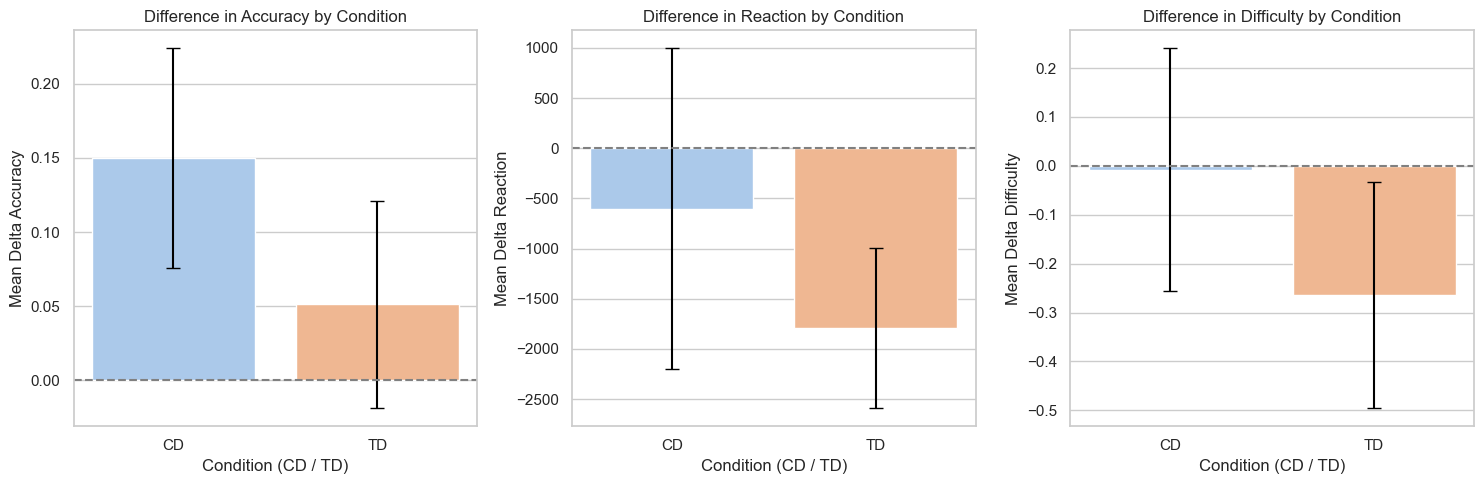

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Sample DataFrame df1 (make sure to replace this with your actual DataFrame)
# df1 = pd.DataFrame(...)

# Step 1: Pivot the table to get separate columns for each combination of pair and stimulus_type
delta_df = df1.pivot(index='userId', columns=['pair', 'stimulus_type'], values=['accuracy', 'avg_reaction_time', 'avg_difficulty'])

# Flatten the columns after pivoting to make them single-level
delta_df.columns = ['_'.join(map(str, col)).strip() for col in delta_df.columns.values]

# Step 2: Calculate delta values between rectangle and star for CD and TD conditions
delta_df['delta_accuracy_CD'] = delta_df['accuracy_CD_rectangle'] - delta_df['accuracy_CD_star']
delta_df['delta_accuracy_TD'] = delta_df['accuracy_TD_rectangle'] - delta_df['accuracy_TD_star']
delta_df['delta_reaction_CD'] = delta_df['avg_reaction_time_CD_rectangle'] - delta_df['avg_reaction_time_CD_star']
delta_df['delta_reaction_TD'] = delta_df['avg_reaction_time_TD_rectangle'] - delta_df['avg_reaction_time_TD_star']
delta_df['delta_difficulty_CD'] = delta_df['avg_difficulty_CD_rectangle'] - delta_df['avg_difficulty_CD_star']
delta_df['delta_difficulty_TD'] = delta_df['avg_difficulty_TD_rectangle'] - delta_df['avg_difficulty_TD_star']

# Step 3: Prepare DataFrame for plotting with mean and 95% confidence intervals
plot_data = []

# Loop through each DV
for dv in ['accuracy', 'reaction', 'difficulty']:
    for condition in ['CD', 'TD']:
        # Calculate mean differences
        mean_delta = delta_df[f'delta_{dv}_{condition}'].mean()
        se = delta_df[f'delta_{dv}_{condition}'].std() / np.sqrt(delta_df.shape[0])  # Standard error
        ci = se * stats.t.ppf(0.975, delta_df.shape[0] - 1)  # 95% CI
        plot_data.append({
            'Condition': condition,
            'Mean_Delta': mean_delta,
            'CI_Lower': mean_delta - ci,
            'CI_Upper': mean_delta + ci,
            'DV': dv
        })

# Convert to DataFrame
plot_df = pd.DataFrame(plot_data)

# Check the prepared DataFrame
print("Prepared DataFrame for plotting:\n", plot_df)

# Step 4: Plotting
plt.figure(figsize=(15, 5))

# Loop through each DV to create subplots
for i, dv in enumerate(['accuracy', 'reaction', 'difficulty']):
    plt.subplot(1, 3, i + 1)

    # Create bar plots for CD and TD conditions
    sns.barplot(data=plot_df[plot_df['DV'] == dv], x='Condition', y='Mean_Delta', errorbar=None, palette='pastel')

    # Add error bars
    for j, row in plot_df[plot_df['DV'] == dv].iterrows():
        plt.errorbar(x=row['Condition'], y=row['Mean_Delta'], yerr=[[row['Mean_Delta'] - row['CI_Lower']], [row['CI_Upper'] - row['Mean_Delta']]], 
                 capsize=5, color='black', linestyle='None')

    plt.title(f'Difference in {dv.capitalize()} by Condition')
    plt.axhline(0, color='gray', linestyle='--')  # Reference line at y=0
    plt.ylabel(f'Mean Delta {dv.capitalize()}')
    plt.xlabel('Condition (CD / TD)')

plt.tight_layout()
plt.show()


In [2]:
df1

NameError: name 'df1' is not defined

In [31]:
collapsed_data = df1.groupby(['userId', 'stimulus_type']).agg({
    'accuracy': 'mean',
    'avg_reaction_time': 'mean',
    'avg_difficulty': 'mean'
}).reset_index()

# Step 2: Pivot to wide format for each variable
accuracy_wide = collapsed_data.pivot(index='userId', columns='stimulus_type', values='accuracy')
reaction_time_wide = collapsed_data.pivot(index='userId', columns='stimulus_type', values='avg_reaction_time')
difficulty_wide = collapsed_data.pivot(index='userId', columns='stimulus_type', values='avg_difficulty')

# Step 3: Calculate the difference for each variable
accuracy_wide['difference'] = accuracy_wide['star'] - accuracy_wide['rectangle']
reaction_time_wide['difference'] = reaction_time_wide['star'] - reaction_time_wide['rectangle']
difficulty_wide['difference'] = difficulty_wide['star'] - difficulty_wide['rectangle']



In [32]:
# Compute mean and 95% CI for each metric's difference
def compute_mean_ci(data):
    mean_diff = data['difference'].mean()
    sem_diff = data['difference'].sem()
    ci_diff = sem_diff * stats.t.ppf((1 + 0.95) / 2, len(data) - 1)
    return mean_diff, ci_diff

In [33]:
# Function to compute Cohen's d for paired samples
def compute_cohens_d_paired(group1, group2):
    differences = group1 - group2
    mean_diff = np.mean(differences)
    std_diff = np.std(differences, ddof=1)  # ddof=1 for sample std dev
    cohens_d = mean_diff / std_diff
#     return f"{cohens_d:.3e}"
    return cohens_d
# Format p-value to display '<0.001' if it's smaller than 0.001
def format_p_value(p_value):
    if p_value < 0.001:
        return "<0.001"
    else:
        return f"{p_value:.3f}"

In [34]:
from scipy import stats
t_stat_accuracy, p_value_accuracy = stats.ttest_rel(accuracy_wide['star'], accuracy_wide['rectangle'])
cohens_d_accuracy = compute_cohens_d_paired(accuracy_wide['star'], accuracy_wide['rectangle'])
p_value_accuracy = format_p_value(p_value_accuracy)

t_stat_rt, p_value_rt = stats.ttest_rel(reaction_time_wide['star'], reaction_time_wide['rectangle'])
cohens_d_rt = compute_cohens_d_paired(reaction_time_wide['star'], reaction_time_wide['rectangle'])
p_value_rt = format_p_value(p_value_rt)

t_stat_difficulty, p_value_difficulty = stats.ttest_rel(difficulty_wide['star'],difficulty_wide['rectangle'])
cohens_d_difficulty = compute_cohens_d_paired(difficulty_wide['star'],difficulty_wide['rectangle'])
p_value_difficulty = format_p_value(p_value_difficulty)

/var/folders/kc/rbd8sj0d2q7bh_61jwm5hsf00000gn/T/ipykernel_1365/3109670318.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=['Difference (Star - Rectangle)'], y=[accuracy_mean_diff], ci=None, color='skyblue')
/Users/vani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/vani/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)
/var/folders/kc/rbd8sj0d2q7bh_61jwm5hsf00000gn/T/ipykernel_1365/3109670318.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be

t(42) = -3.472, p = 0.001,
 Cohen's d = -0.529
t(42) = 2.863, p = 0.007,
 Cohen's d = 0.437
t(42) = 1.671, p = 0.102,
 Cohen's d = 0.255


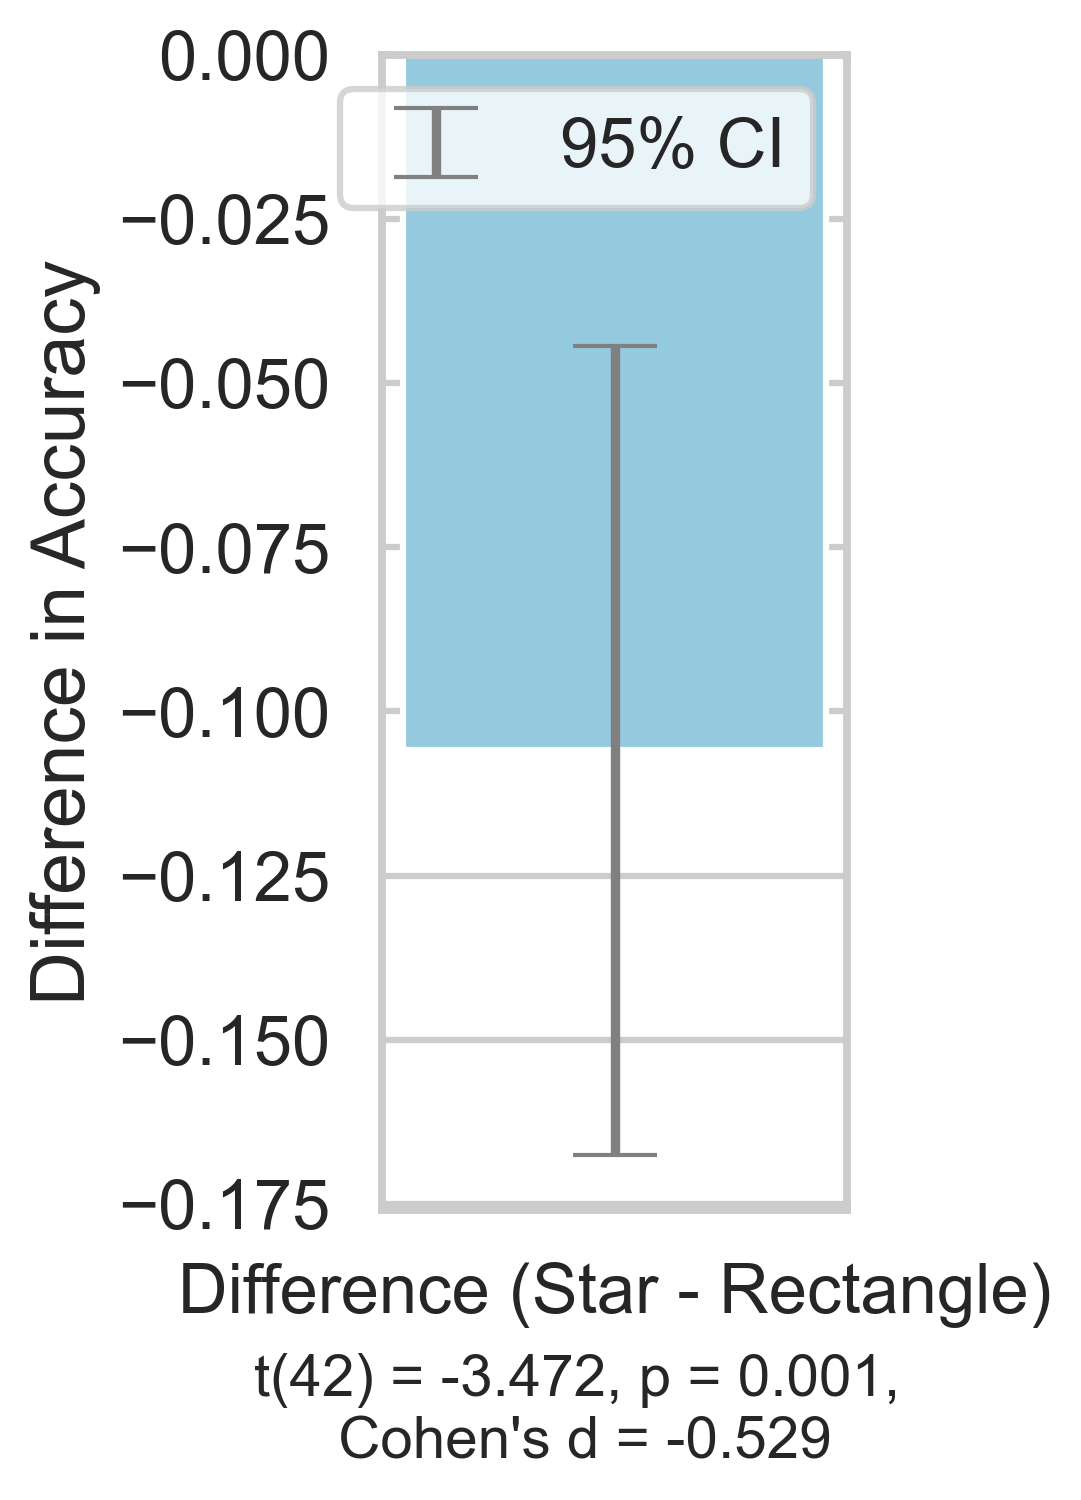

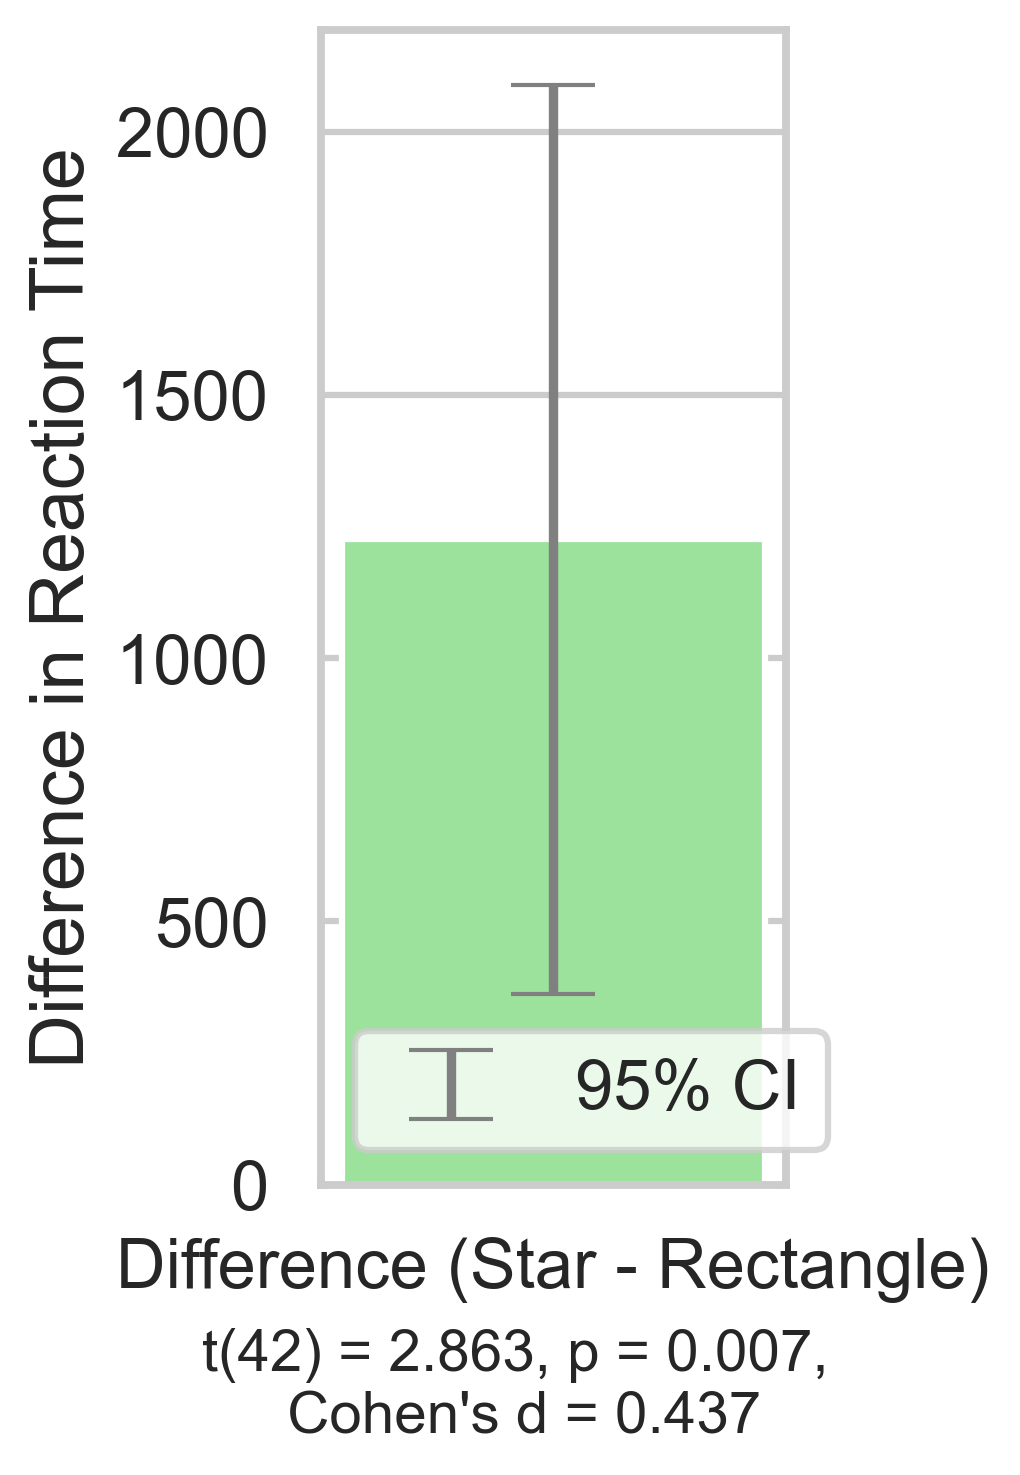

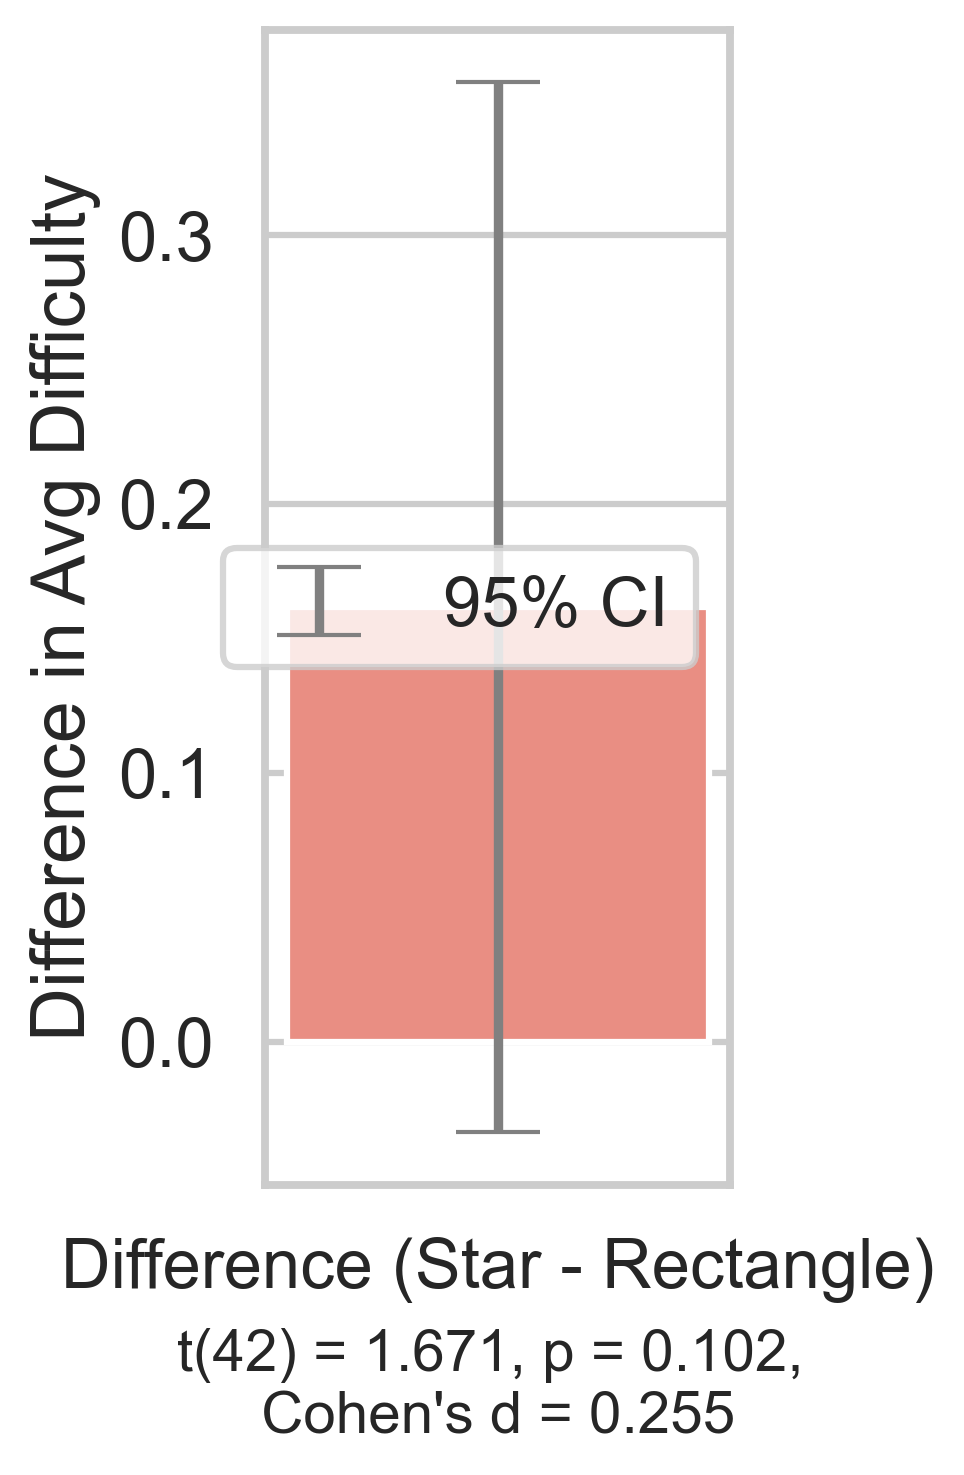

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Calculate mean and CI for each variable
accuracy_mean_diff, accuracy_ci_diff = compute_mean_ci(accuracy_wide)
reaction_time_mean_diff, reaction_time_ci_diff = compute_mean_ci(reaction_time_wide)
difficulty_mean_diff, difficulty_ci_diff = compute_mean_ci(difficulty_wide)

# Set style and context for better presentation quality
sns.set_theme(style='whitegrid')
sns.set_context("talk")  # Enlarged text suitable for presentations


# Plot for Accuracy
plt.figure(figsize=(2, 5), dpi=300)
sns.barplot(x=['Difference (Star - Rectangle)'], y=[accuracy_mean_diff], ci=None, color='skyblue')
plt.errorbar(x=[0], y=[accuracy_mean_diff], yerr=accuracy_ci_diff, fmt='none', capsize=10, color='gray', label='95% CI')
plt.ylabel("Difference in Accuracy")
# plt.title("Mean Difference in Accuracy \n between Star and Rectangle \n Stimuli Types")
# Shift x-axis label to the left by adjusting labelpad on axis object
# ax.set_xlabel("Difference (Star - Rectangle)", labelpad=-10, ha='left')
plt.legend()
# Add statistics below the figure in a single line
text = f"t({len(accuracy_wide) - 1}) = {t_stat_accuracy:.3f}, p = {p_value_accuracy},\n Cohen's d = {cohens_d_accuracy:.3f}"
print(text)
plt.figtext(0.45, -0.05, text, wrap=True, horizontalalignment='center', fontsize=14)
plt.tight_layout()
# plt.show()

# Plot for Reaction Time
plt.figure(figsize=(2, 5), dpi=300)
sns.barplot(x=['Difference (Star - Rectangle)'], y=[reaction_time_mean_diff], ci=None, color='lightgreen')
plt.errorbar(x=[0], y=[reaction_time_mean_diff], yerr=reaction_time_ci_diff, fmt='none', capsize=10, color='gray', label='95% CI')
plt.ylabel("Difference in Reaction Time")
# plt.title("Mean Difference in Reaction Time \n between Star and Rectangle \n Stimuli Types")

# Shift x-axis label to the left by adjusting labelpad
# plt.xlabel("Difference (Star - Rectangle)", labelpad=-10, ha='left')
plt.legend()
# Add statistics below the figure in a single line
text = f"t({len(reaction_time_wide) - 1}) = {t_stat_rt:.3f}, p = {p_value_rt},\n Cohen's d = {cohens_d_rt:.3f}"
print(text)
plt.figtext(0.45, -0.05, text, wrap=True, horizontalalignment='center', fontsize=14)

plt.tight_layout()

# plt.show()

# Plot for Difficulty
plt.figure(figsize=(2, 5), dpi=300)
sns.barplot(x=['Difference (Star - Rectangle)'], y=[difficulty_mean_diff], ci=None, color='salmon')
plt.errorbar(x=[0], y=[difficulty_mean_diff], yerr=difficulty_ci_diff, fmt='none', capsize=10, color='gray', label='95% CI')
plt.ylabel("Difference in Avg Difficulty")
# plt.title("Mean Difference in Difficulty between Star and Rectangle stimuly types")
plt.legend()
# Add statistics below the figure in a single line
text = f"t({len(difficulty_wide) - 1}) = {t_stat_difficulty:.3f}, p = {p_value_difficulty},\n Cohen's d = {cohens_d_difficulty:.3f}"
print(text)
plt.figtext(0.5, -0.05, text, wrap=True, horizontalalignment='center', fontsize=14)

plt.tight_layout()
# plt.show()

/var/folders/kc/rbd8sj0d2q7bh_61jwm5hsf00000gn/T/ipykernel_1365/162538886.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( y=[accuracy_mean_diff], ci=None, color='skyblue', ax=ax)


t(42) = -3.472, p = 0.001,
 Cohen's d = -0.529


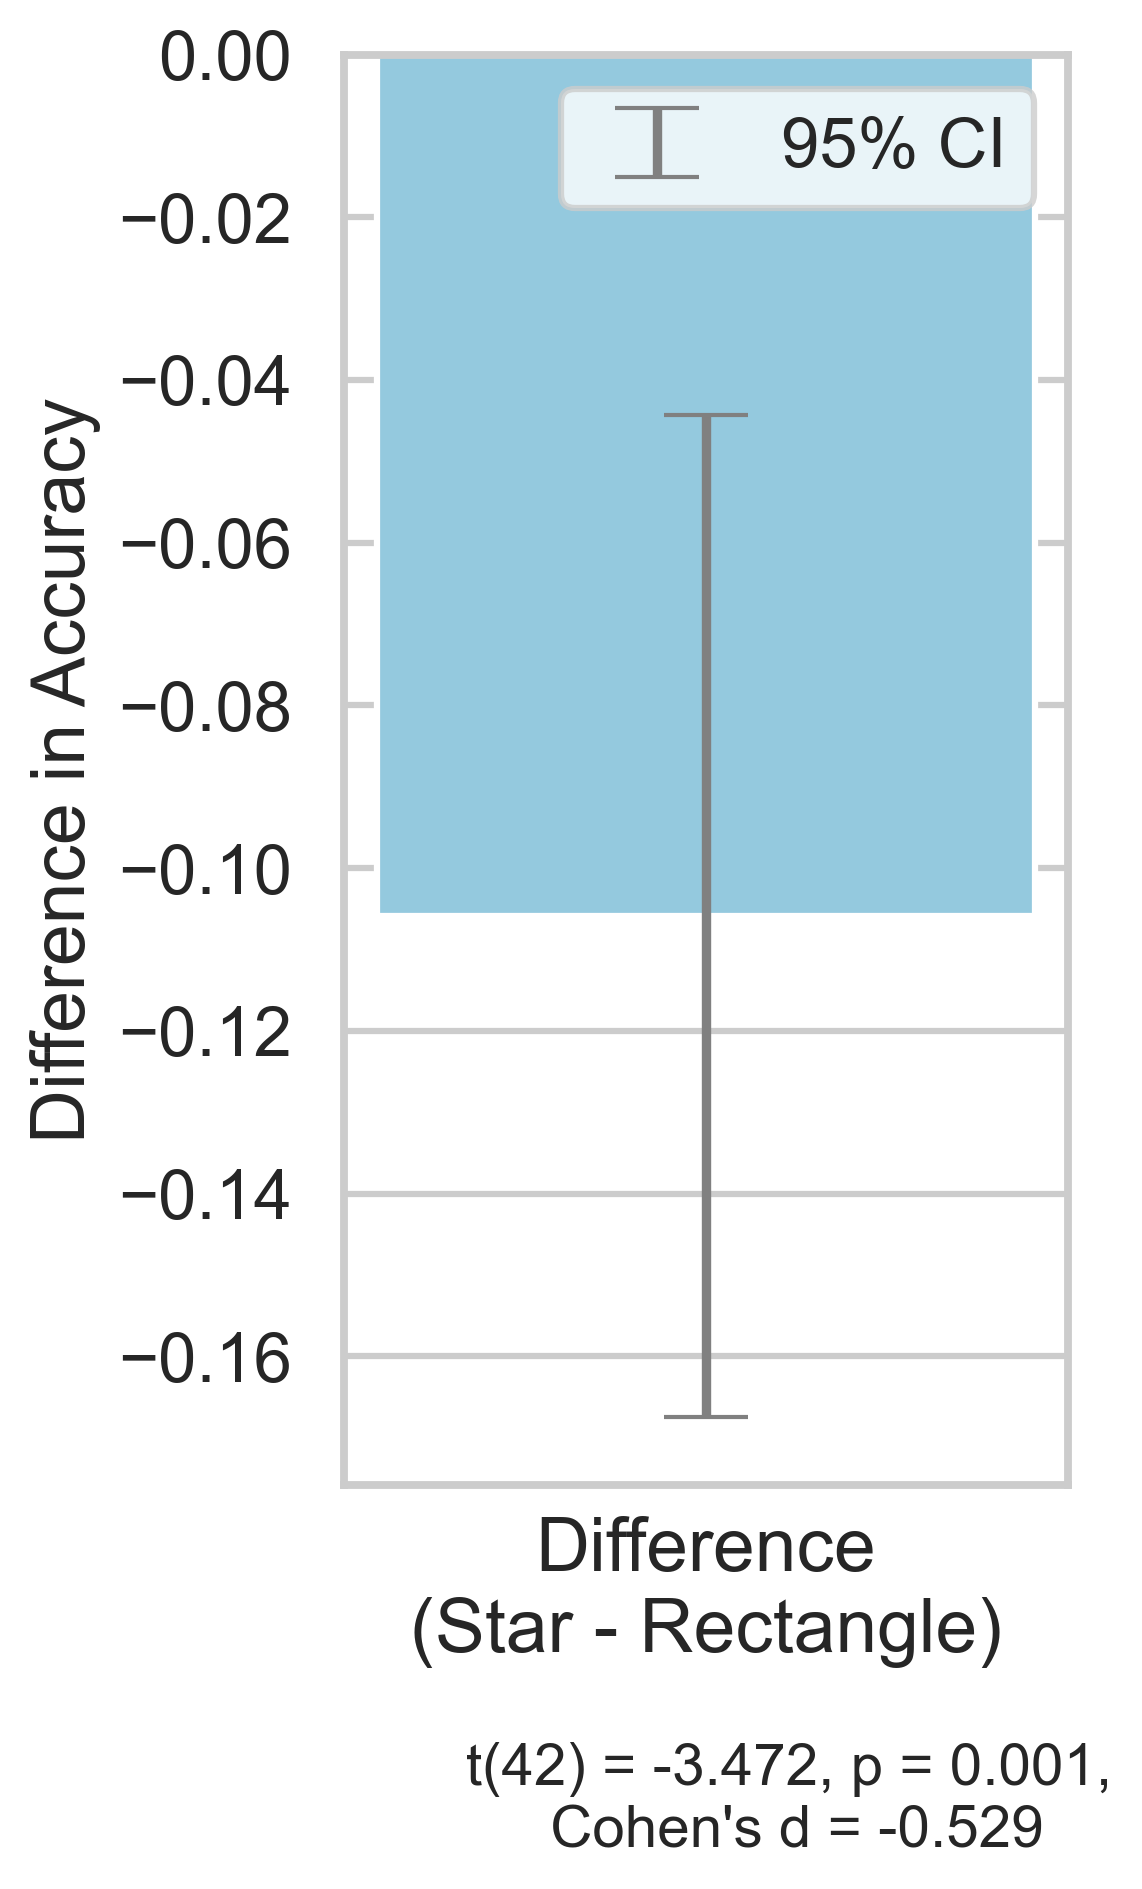

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots(figsize=(4, 6), dpi=300)

# Bar plot for Reaction Time
sns.barplot( y=[accuracy_mean_diff], ci=None, color='skyblue', ax=ax)
ax.errorbar(x=[0], y=[accuracy_mean_diff], yerr=accuracy_ci_diff, fmt='none', capsize=10, color='gray', label='95% CI')
ax.set_ylabel("Difference in Accuracy")

# Shift x-axis label to the left by adjusting labelpad on axis object
ax.set_xlabel("Difference\n(Star - Rectangle)", labelpad= -5, ha='center')

# Add legend
ax.legend()

# Add statistics below the figure in a single line and shift to the left
text = f"t({len(accuracy_wide) - 1}) = {t_stat_accuracy:.3f}, p = {p_value_accuracy},\n Cohen's d = {cohens_d_accuracy:.3f}"
print(text)
fig.text(0.7, -0.05, text, wrap=True, horizontalalignment='center', fontsize=14)

fig.tight_layout()
plt.show()

t(42) = 2.863, p = 0.007,
 Cohen's d = 0.437


/var/folders/kc/rbd8sj0d2q7bh_61jwm5hsf00000gn/T/ipykernel_1365/1347381627.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( y=[reaction_time_mean_diff], ci=None, color='lightgreen', ax=ax)


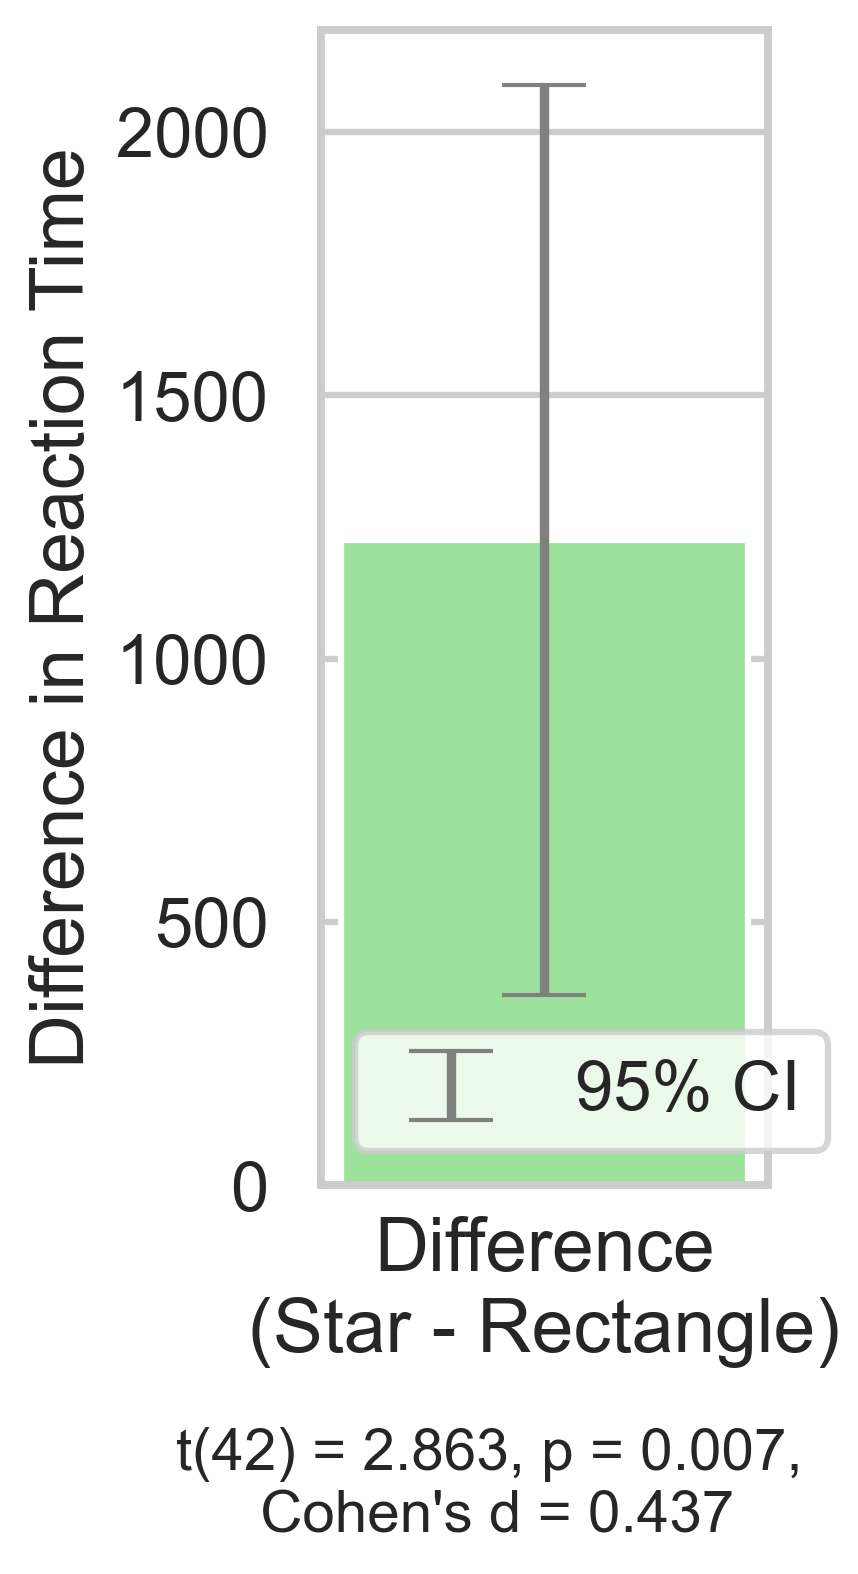

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots(figsize=(3, 5), dpi=300)

# Bar plot for Reaction Time
sns.barplot( y=[reaction_time_mean_diff], ci=None, color='lightgreen', ax=ax)
ax.errorbar(x=[0], y=[reaction_time_mean_diff], yerr=reaction_time_ci_diff, fmt='none', capsize=10, color='gray', label='95% CI')
ax.set_ylabel("Difference in Reaction Time")

# Shift x-axis label to the left by adjusting labelpad on axis object
ax.set_xlabel("Difference\n(Star - Rectangle)", labelpad= -5, ha='center')

# Add legend
ax.legend()

# Add statistics below the figure in a single line and shift to the left
text = f"t({len(reaction_time_wide) - 1}) = {t_stat_rt:.3f}, p = {p_value_rt},\n Cohen's d = {cohens_d_rt:.3f}"
print(text)
fig.text(0.6, -0.05, text, wrap=True, horizontalalignment='center', fontsize=14)

fig.tight_layout()
plt.show()

/var/folders/kc/rbd8sj0d2q7bh_61jwm5hsf00000gn/T/ipykernel_1219/1286616671.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=['Difference (Oblique - Aligned)'], y=[accuracy_mean_diff], ci=None, color=colors['accuracy'])
/Users/vani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/vani/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


TypeError: '<' not supported between instances of 'str' and 'float'

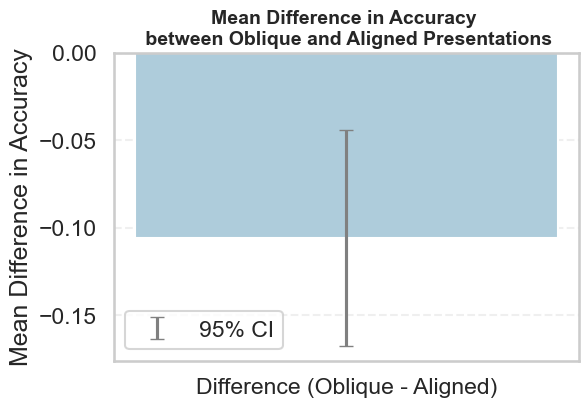

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette for a light, professional look
colors = {
    'accuracy': '#A6CEE3',  # Light blue
    'reaction_time': '#B2DF8A',  # Light green
    'difficulty': '#FDBF6F'  # Soft orange
}

# Plot for Accuracy
plt.figure(figsize=(6, 4))
sns.barplot(x=['Difference (Oblique - Aligned)'], y=[accuracy_mean_diff], ci=None, color=colors['accuracy'])
plt.errorbar(x=[0], y=[accuracy_mean_diff], yerr=accuracy_ci_diff, fmt='none', capsize=5, color='gray', label='95% CI')
plt.ylabel("Mean Difference in Accuracy")
plt.title("Mean Difference in Accuracy \n between Oblique and Aligned Presentations", fontsize=14, fontweight='semibold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
text_accuracy = f"t({len(accuracy_wide['star']) - 1}) = {t_stat_accuracy:.2f}, p = {format_p_value(p_value_accuracy)}, Cohen's d = {cohens_d_accuracy:.2f}"
plt.figtext(0.5, -0.1, text_accuracy, wrap=True, horizontalalignment='center', fontsize=10, color="gray")
plt.tight_layout()
plt.show()

# Plot for Reaction Time
plt.figure(figsize=(6, 4))
sns.barplot(x=['Difference (Oblique - Aligned)'], y=[reaction_time_mean_diff], ci=None, color=colors['reaction_time'])
plt.errorbar(x=[0], y=[reaction_time_mean_diff], yerr=reaction_time_ci_diff, fmt='none', capsize=5, color='gray', label='95% CI')
plt.ylabel("Mean Difference in Avg Reaction Time")
plt.title("Mean Difference in Reaction Time between Oblique and Aligned Presentations", fontsize=14, fontweight='semibold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
text_reaction_time = f"t({len(reaction_time_wide['aligned']) - 1}) = {t_stat_reaction_time:.2f}, p = {format_p_value(p_value_reaction_time)}, Cohen's d = {cohens_d_reaction_time:.2f}"
plt.figtext(0.5, -0.1, text_reaction_time, wrap=True, horizontalalignment='center', fontsize=10, color="gray")
plt.tight_layout()
plt.show()

# Plot for Difficulty
plt.figure(figsize=(6, 4))
sns.barplot(x=['Difference (Oblique - Aligned)'], y=[difficulty_mean_diff], ci=None, color=colors['difficulty'])
plt.errorbar(x=[0], y=[difficulty_mean_diff], yerr=difficulty_ci_diff, fmt='none', capsize=5, color='gray', label='95% CI')
plt.ylabel("Mean Difference in Avg Difficulty")
plt.title("Mean Difference in Difficulty between Oblique and Aligned Presentations", fontsize=14, fontweight='semibold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
text_difficulty = f"t({len(difficulty_wide['aligned']) - 1}) = {t_stat_difficulty:.2f}, p = {format_p_value(p_value_difficulty)}, Cohen's d = {cohens_d_difficulty:.2f}"
plt.figtext(0.5, -0.1, text_difficulty, wrap=True, horizontalalignment='center', fontsize=10, color="gray")
plt.tight_layout()
plt.show()

In [26]:
def eta_squared_to_cohens_d(eta_squared):
    """
    Convert partial eta squared to Cohen's d.
    
    Parameters:
    eta_squared (float): Partial eta squared value (0 <= eta_squared < 1).
    
    Returns:
    float: Cohen's d value.
    """
    if not (0 <= eta_squared < 1):
        raise ValueError("Partial eta squared must be in the range [0, 1).")
    
    # Calculate Cohen's d using the formula
    cohens_d = (2 * np.sqrt(eta_squared)) / np.sqrt(1 - eta_squared)
    return cohens_d
eta_squared_to_cohens_d(0.579)

2.345461073745641

# Write the DataFrame to a CSV file
all_data_filtered.to_csv('pooled_data_tod_30thOct24.csv', index=False)

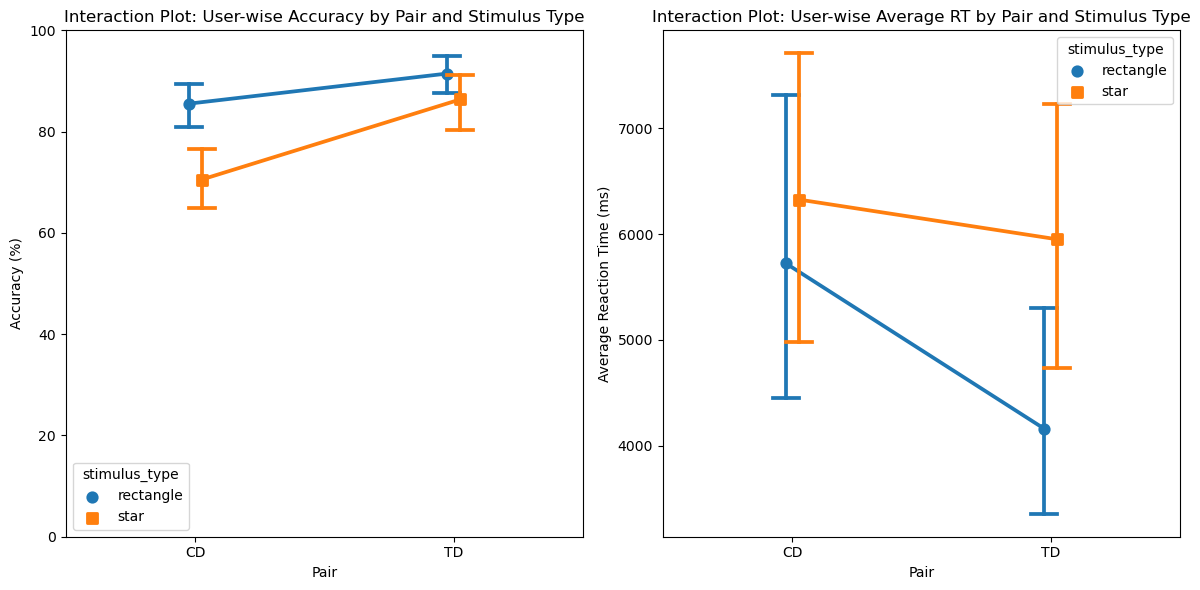

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def compute_userwise_accuracy_rt(all_data_filtered):
    # Step 1: Add the 'correct' column
    all_data_filtered['correct'] = all_data_filtered['formatted_response'] == all_data_filtered['formatted_target']

    # Step 2: Filter the data for relevant conditions
    relevant_data = all_data_filtered[
        (all_data_filtered['stimulus_type'].isin(['star', 'rectangle'])) &
        (all_data_filtered['pair'].isin(['TD', 'CD']))
    ]
    
    # Step 3: Compute user-wise accuracy and average RT
    user_summary = (
        relevant_data.groupby(['userId', 'stimulus_type', 'pair'])
        .agg(
            total_trials=('correct', 'size'),        # Total trials
            correct_trials=('correct', 'sum'),       # Number of correct responses
            avg_rt=('duration', 'mean')              # Average reaction time
        )
        .reset_index()
    )
    
    # Step 4: Calculate accuracy
    user_summary['accuracy'] = (user_summary['correct_trials'] / user_summary['total_trials']) * 100

    # Step 5: Calculate 95% CI for accuracy
    user_summary['se_accuracy'] = np.sqrt((user_summary['accuracy'] * (100 - user_summary['accuracy'])) / user_summary['total_trials'])
    user_summary['ci_accuracy'] = 1.96 * user_summary['se_accuracy']

    # Step 6: Calculate 95% CI for average RT
    user_summary['se_rt'] = user_summary['avg_rt'] / np.sqrt(user_summary['total_trials'])
    user_summary['ci_rt'] = 1.96 * user_summary['se_rt']

    # Step 7: Plotting Interaction for Accuracy
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.pointplot(data=user_summary, x='pair', y='accuracy', hue='stimulus_type', dodge=True, markers=['o', 's'], capsize=0.1)
#     plt.errorbar(x=user_summary['pair'], y=user_summary['accuracy'], 
#                  yerr=user_summary['ci_accuracy'], fmt='none', c='black', capsize=5)
    plt.title('Interaction Plot: User-wise Accuracy by Pair and Stimulus Type')
    plt.ylim(0, 100)
    plt.ylabel('Accuracy (%)')
    plt.xlabel('Pair')

    # Step 8: Plotting Interaction for Average RT
    plt.subplot(1, 2, 2)
    sns.pointplot(data=user_summary, x='pair', y='avg_rt', hue='stimulus_type', dodge=True, markers=['o', 's'], capsize=0.1)
#     plt.errorbar(x=user_summary['pair'], y=user_summary['avg_rt'], 
#                  yerr=user_summary['ci_rt'], fmt='none', c='black', capsize=5)
    plt.title('Interaction Plot: User-wise Average RT by Pair and Stimulus Type')
    plt.ylabel('Average Reaction Time (ms)')
    plt.xlabel('Pair')

    plt.tight_layout()
    plt.show()

# Usage
compute_userwise_accuracy_rt(all_data_filtered)

In [12]:
# import pandas as pd
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

# def compute_userwise_accuracy_rt(data):
#     """
#     Compute user-wise accuracy and average reaction time (RT) for each condition.
#     Returns the summarized DataFrame, ANOVA results with p-values and effect sizes.
    
#     Parameters:
#     - data: DataFrame containing the relevant columns.

#     Returns:
#     - user_summary: DataFrame with user-wise accuracy and RT
#     - accuracy_anova_results: ANOVA results for accuracy
#     - accuracy_effect_sizes: Dictionary of effect sizes for accuracy ANOVA
#     - rt_anova_results: ANOVA results for reaction time
#     - rt_effect_sizes: Dictionary of effect sizes for RT ANOVA
#     """
#     # Calculate whether the response was correct
#     data['correct'] = data['formatted_response'] == data['formatted_target']

#     # Compute user-wise accuracy and average RT
#     user_summary = data.groupby(['userId', 'stimulus_type', 'pair']).agg(
#         accuracy=('correct', 'mean'),
#         avg_rt=('duration', 'mean')
#     ).reset_index()

#     # Run Two-Way ANOVA for accuracy
#     accuracy_model = ols('accuracy ~ C(stimulus_type) * C(pair)', data=user_summary).fit()
#     accuracy_anova_results = sm.stats.anova_lm(accuracy_model, typ=2)

#     # Calculate effect size for accuracy (Partial Eta Squared)
#     accuracy_effect_sizes = accuracy_anova_results['sum_sq'] / accuracy_anova_results['sum_sq'].sum()

#     # Run Two-Way ANOVA for RT
#     rt_model = ols('avg_rt ~ C(stimulus_type) * C(pair)', data=user_summary).fit()
#     rt_anova_results = sm.stats.anova_lm(rt_model, typ=2)

#     # Calculate effect size for RT (Partial Eta Squared)
#     rt_effect_sizes = rt_anova_results['sum_sq'] / rt_anova_results['sum_sq'].sum()

#     return user_summary, accuracy_anova_results, accuracy_effect_sizes, rt_anova_results, rt_effect_sizes

# # Function to report ANOVA results in a formatted way
# def report_anova_results(anova_results, effect_sizes=None):
#     """
#     Report ANOVA results in a formatted way.
    
#     Parameters:
#     - anova_results: DataFrame containing ANOVA results with F-statistics and p-values.
#     - effect_sizes: Series of effect sizes for the results.
    
#     Returns:
#     - None; prints the formatted results.
#     """
    
#     # Iterate through each source in the ANOVA results
#     for source in anova_results.index:
#         # Extract relevant statistics
#         df = anova_results.loc[source, 'df']
#         f_stat = anova_results.loc[source, 'F']
#         p_value = anova_results.loc[source, 'PR(>F)']
        
#         # Formatting the p-value for readability
#         if p_value < 0.001:
#             p_value_formatted = "< 0.001"
#         else:
#             p_value_formatted = f"{p_value:.3f}"
        
#         # Get the corresponding effect size
#         if effect_sizes is not None:
#             effect_size = effect_sizes[source]  # Get the effect size for the current source
#             print(f"ANOVA for {source}: F({df}) = {f_stat:.3f}, p = {p_value_formatted}. Effect size: {effect_size:.3f}.")
#         else:
#             print(f"ANOVA for {source}: F({df}) = {f_stat:.3f}, p = {p_value_formatted}.")

# # Example usage
# user_summary, accuracy_anova_results, accuracy_effect_sizes, rt_anova_results, rt_effect_sizes = compute_userwise_accuracy_rt(all_data_filtered)

# # Report the ANOVA results for accuracy
# print("\nANOVA Results for Accuracy:")
# report_anova_results(accuracy_anova_results, accuracy_effect_sizes)

# # Report the ANOVA results for Reaction Time
# print("\nANOVA Results for Reaction Time:")
# report_anova_results(rt_anova_results, rt_effect_sizes)


ANOVA Results for Accuracy:
ANOVA for C(stimulus_type): F(1.0) = 15.740, p = < 0.001. Effect size: 0.078.
ANOVA for C(pair): F(1.0) = 18.479, p = < 0.001. Effect size: 0.091.
ANOVA for C(stimulus_type):C(pair): F(1.0) = 3.799, p = 0.053. Effect size: 0.019.
ANOVA for Residual: F(164.0) = nan, p = nan. Effect size: 0.812.

ANOVA Results for Reaction Time:
ANOVA for C(stimulus_type): F(1.0) = 3.232, p = 0.074. Effect size: 0.019.
ANOVA for C(pair): F(1.0) = 2.125, p = 0.147. Effect size: 0.012.
ANOVA for C(stimulus_type):C(pair): F(1.0) = 0.797, p = 0.373. Effect size: 0.005.
ANOVA for Residual: F(164.0) = nan, p = nan. Effect size: 0.964.


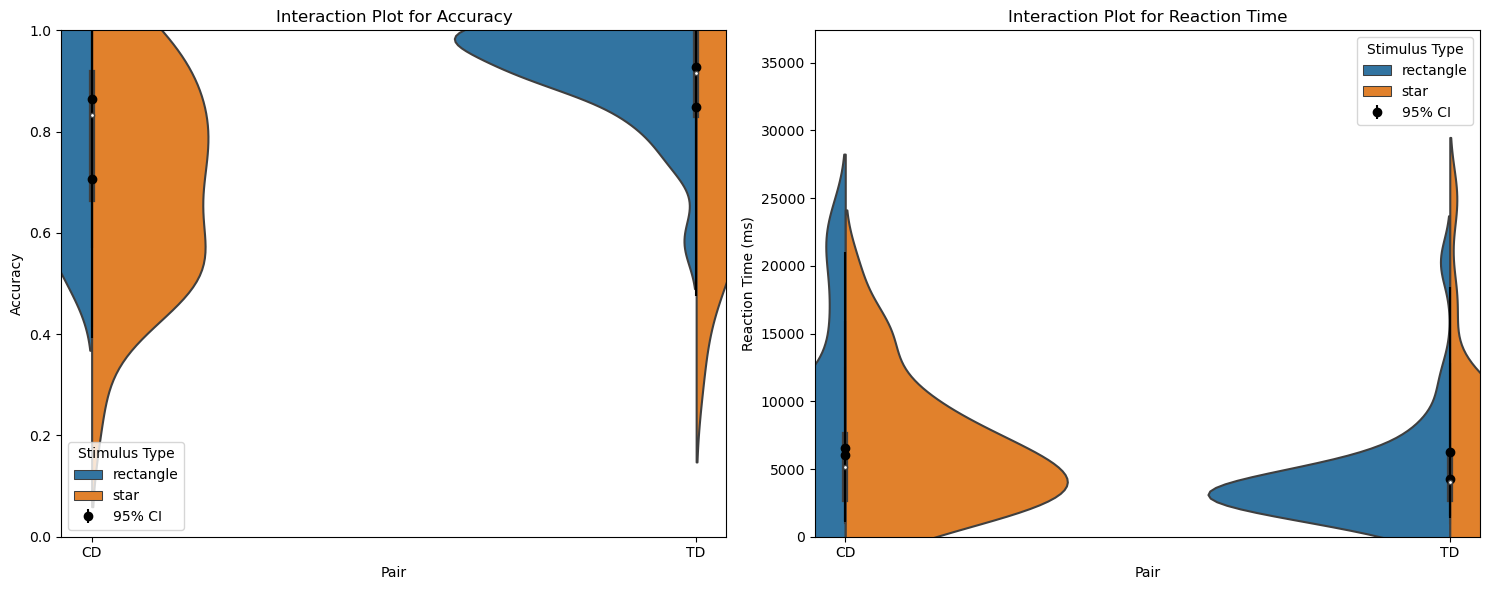

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

def compute_userwise_accuracy_rt(data):
    data['correct'] = data['formatted_response'] == data['formatted_target']
    user_summary = data.groupby(['userId', 'stimulus_type', 'pair']).agg(
        accuracy=('correct', 'mean'),
        avg_rt=('duration', 'mean')
    ).reset_index()
    
    return user_summary

def plot_interaction(user_summary):
    # Calculate means and 95% CI for accuracy
    accuracy_summary = user_summary.groupby(['stimulus_type', 'pair']).agg(
        mean_accuracy=('accuracy', 'mean'),
        ci_low_accuracy=('accuracy', lambda x: np.percentile(x, 2.5)),
        ci_high_accuracy=('accuracy', lambda x: np.percentile(x, 97.5))
    ).reset_index()

    # Calculate means and 95% CI for RT
    rt_summary = user_summary.groupby(['stimulus_type', 'pair']).agg(
        mean_rt=('avg_rt', 'mean'),
        ci_low_rt=('avg_rt', lambda x: np.percentile(x, 2.5)),
        ci_high_rt=('avg_rt', lambda x: np.percentile(x, 97.5))
    ).reset_index()

    # Set up the figure and axes
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Violin plot for Accuracy
    sns.violinplot(x='pair', y='accuracy', hue='stimulus_type', data=user_summary, ax=axes[0], split=True)
    axes[0].errorbar(accuracy_summary['pair'], accuracy_summary['mean_accuracy'], 
                     yerr=[accuracy_summary['mean_accuracy'] - accuracy_summary['ci_low_accuracy'],
                           accuracy_summary['ci_high_accuracy'] - accuracy_summary['mean_accuracy']], 
                     fmt='o', color='black', label='95% CI')
    axes[0].set_title('Interaction Plot for Accuracy')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Pair')
    axes[0].legend(title='Stimulus Type')

    # Adjust the y-axis limits for accuracy
    axes[0].set_ylim(0, 1)  # Set to range from 0 to 1 (adjust as needed)

    # Violin plot for RT
    sns.violinplot(x='pair', y='avg_rt', hue='stimulus_type', data=user_summary, ax=axes[1], split=True)
    axes[1].errorbar(rt_summary['pair'], rt_summary['mean_rt'], 
                     yerr=[rt_summary['mean_rt'] - rt_summary['ci_low_rt'],
                           rt_summary['ci_high_rt'] - rt_summary['mean_rt']], 
                     fmt='o', color='black', label='95% CI')
    axes[1].set_title('Interaction Plot for Reaction Time')
    axes[1].set_ylabel('Reaction Time (ms)')
    axes[1].set_xlabel('Pair')
    axes[1].legend(title='Stimulus Type')

    # Adjust the y-axis limits for Reaction Time
    axes[1].set_ylim(0, user_summary['avg_rt'].max() * 1.5)  # Extend the upper limit as needed

    plt.tight_layout()
    plt.show()

# Assuming you already have filtered_data
user_summary = compute_userwise_accuracy_rt(all_data_filtered)

# Create interaction plots
plot_interaction(user_summary)

/var/folders/kc/rbd8sj0d2q7bh_61jwm5hsf00000gn/T/ipykernel_1302/2946482025.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  difficulty_ci = difficulty_summary.groupby(['stimulus_type', 'pair']).apply(
/Users/vani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

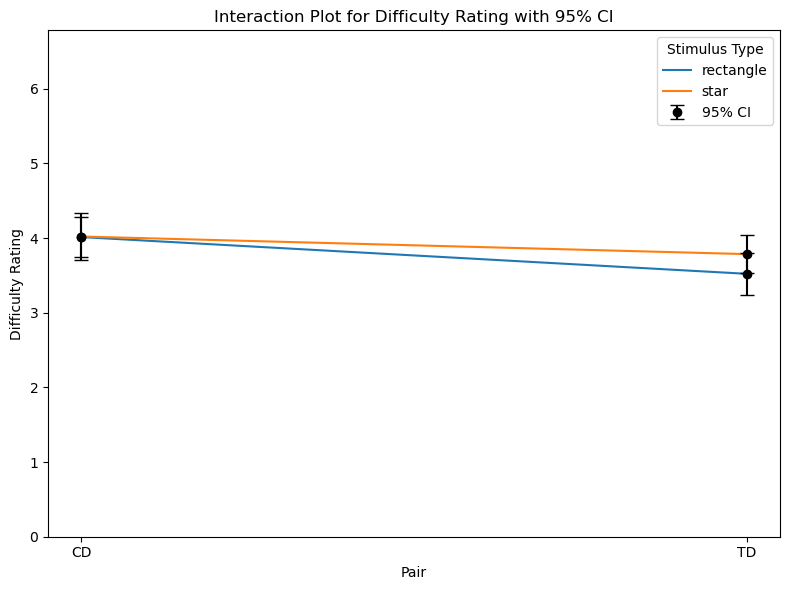

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def compute_userwise_difficulty(data):
    # Ensure 'difficulty' is numeric, coercing errors to NaN
    data['difficulty'] = pd.to_numeric(data['difficulty'], errors='coerce')

    # Group by userId, stimulus_type, and pair to compute mean difficulty
    difficulty_summary = data.groupby(['userId', 'stimulus_type', 'pair']).agg(
        mean_difficulty=('difficulty', 'mean')
    ).reset_index()
    
    return difficulty_summary

def compute_95ci(data, column):
    """
    Compute 95% confidence intervals for a given column.
    """
    mean = data[column].mean()
    sem = stats.sem(data[column].dropna())  # Standard error of the mean, ignoring NaNs
    ci = sem * stats.t.ppf((1 + 0.95) / 2., len(data[column].dropna()) - 1)  # 95% CI
    return mean, mean - ci, mean + ci

def plot_difficulty_interaction(difficulty_summary):
    # Calculate means and 95% CI for difficulty
    difficulty_ci = difficulty_summary.groupby(['stimulus_type', 'pair']).apply(
        lambda x: pd.Series({
            'mean_difficulty': x['mean_difficulty'].mean(),
            'ci_low': compute_95ci(x, 'mean_difficulty')[1],
            'ci_high': compute_95ci(x, 'mean_difficulty')[2]
        })
    ).reset_index()

    # Set up the figure
    plt.figure(figsize=(8, 6))

    # Line plot with 95% CI error bars
    sns.lineplot(data=difficulty_ci, x='pair', y='mean_difficulty', hue='stimulus_type', marker='o')
    
    # Add error bars for 95% CI
    plt.errorbar(difficulty_ci['pair'], difficulty_ci['mean_difficulty'],
                 yerr=[difficulty_ci['mean_difficulty'] - difficulty_ci['ci_low'],
                       difficulty_ci['ci_high'] - difficulty_ci['mean_difficulty']],
                 fmt='o', color='black', capsize=5, label='95% CI')

    plt.title('Interaction Plot for Difficulty Rating with 95% CI')
    plt.ylabel('Difficulty Rating')
    plt.xlabel('Pair')
    plt.legend(title='Stimulus Type')
    plt.ylim(0, difficulty_summary['mean_difficulty'].max() * 1.1)  # Adjust y-axis limit as needed
    plt.tight_layout()
    plt.show()

# Assuming you already have filtered_data
difficulty_summary = compute_userwise_difficulty(all_data_filtered)

# Create interaction plot for difficulty
plot_difficulty_interaction(difficulty_summary)

In [144]:
# Check for missing data in the relevant columns
missing_data = all_data_filtered[['correct', 'stimulus_type', 'pair']].isna().sum()
print("Missing data counts:\n", missing_data)

Missing data counts:
 correct          0
stimulus_type    0
pair             0
dtype: int64


In [145]:
group_sizes = all_data_filtered.groupby(['stimulus_type', 'pair']).size()
print("Group sizes:\n", group_sizes)

Group sizes:
 stimulus_type  pair
rectangle      CD      420
               TD      420
star           CD      421
               TD      420
dtype: int64


In [156]:
# Compute user-wise accuracy and average RT
user_summary = all_data_filtered.groupby(['userId', 'stimulus_type', 'pair']).agg(
    accuracy=('correct', 'mean'),
    avg_rt=('duration', 'mean')
).reset_index()

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Run a simpler ANOVA without interactions
model_simple = ols('accuracy ~ C(stimulus_type) + C(pair)', data=user_summary).fit()
anova_table_simple = sm.stats.anova_lm(model_simple, typ=2)
print(anova_table_simple)

residuals = model_simple.resid
print("Residuals:\n", residuals)

                    sum_sq     df          F    PR(>F)
C(stimulus_type)  0.501388    1.0  19.797986  0.000018
C(pair)           0.371473    1.0  14.668135  0.000194
Residual          3.469553  137.0        NaN       NaN
Residuals:
 0      0.071749
1     -0.114606
2      0.024771
3      0.171749
4     -0.011584
         ...   
135    0.171749
136   -0.178251
137   -0.364606
138    0.274771
139    0.171749
Length: 140, dtype: float64


In [155]:
participant_counts = all_data_filtered.groupby(['stimulus_type', 'pair'])['userId'].nunique()
print(participant_counts)

stimulus_type  pair
rectangle      CD      35
               TD      35
star           CD      35
               TD      35
Name: userId, dtype: int64


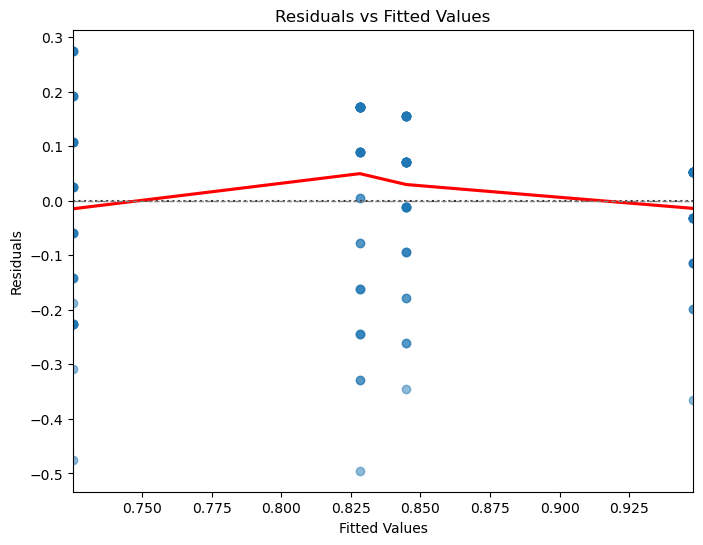

In [157]:
# Get the predicted (fitted) values from the model
fitted_values = model_simple.fittedvalues

# Plot residuals vs fitted values
plt.figure(figsize=(8, 6))
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.5})
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

/Users/vani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


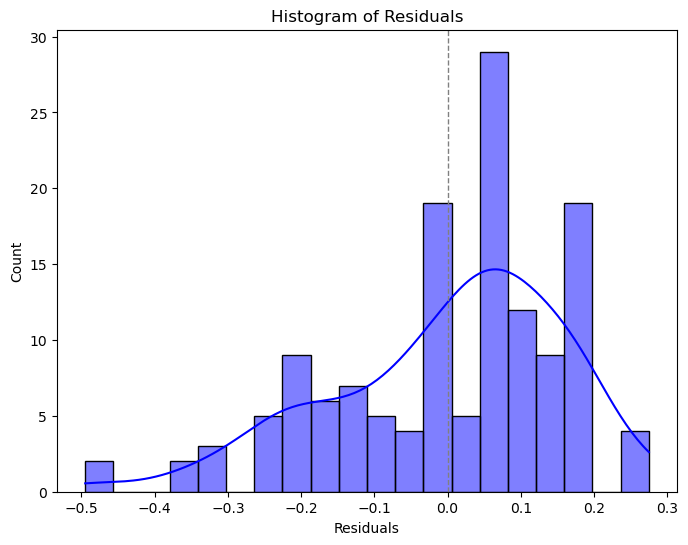

In [158]:
# Plot a histogram of the residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=20)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

/Users/vani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


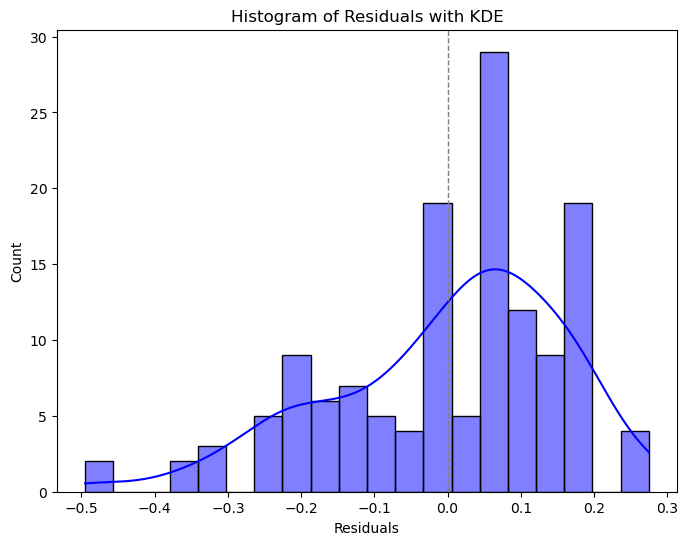

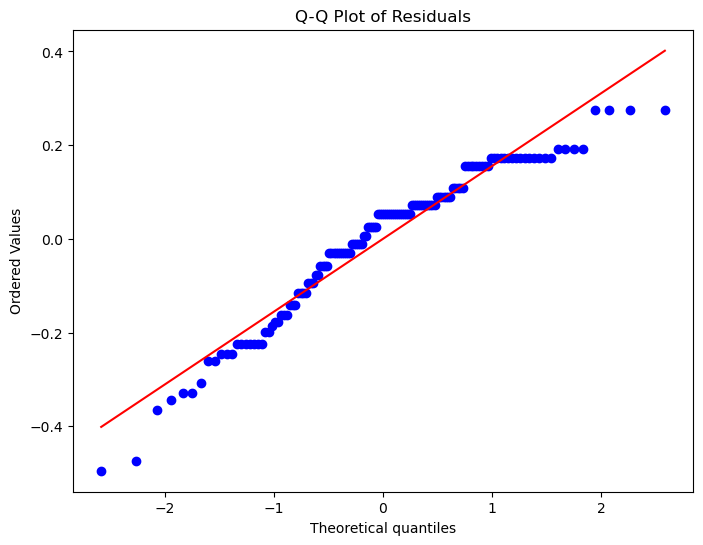

In [159]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram with KDE
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=20)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals with KDE')
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [160]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk test statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

Shapiro-Wilk test statistic: 0.946121096611023, p-value: 2.995778777403757e-05


In [161]:
from scipy.stats import kstest

# Perform KS test
ks_test = kstest(residuals, 'norm')
print(f"KS test statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

KS test statistic: 0.39551990303743423, p-value: 2.9356973840344226e-20


In [162]:
user_summary['log_accuracy'] = np.log(user_summary['accuracy'] + 1e-10)  # Small value added to avoid log(0)

In [163]:
# Run a simpler ANOVA without interactions
model_simple = ols('log_accuracy ~ C(stimulus_type) + C(pair)', data=user_summary).fit()
anova_table_simple = sm.stats.anova_lm(model_simple, typ=2)
print(anova_table_simple)

residuals = model_simple.resid
print("Residuals:\n", residuals)

                    sum_sq     df          F    PR(>F)
C(stimulus_type)  1.054997    1.0  19.779812  0.000018
C(pair)           0.656200    1.0  12.302890  0.000612
Residual          7.307175  137.0        NaN       NaN
Residuals:
 0      0.101222
1     -0.131013
2      0.074168
3      0.224925
4      0.005912
         ...   
135    0.224925
136   -0.217232
137   -0.487688
138    0.361850
139    0.224925
Length: 140, dtype: float64


/Users/vani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


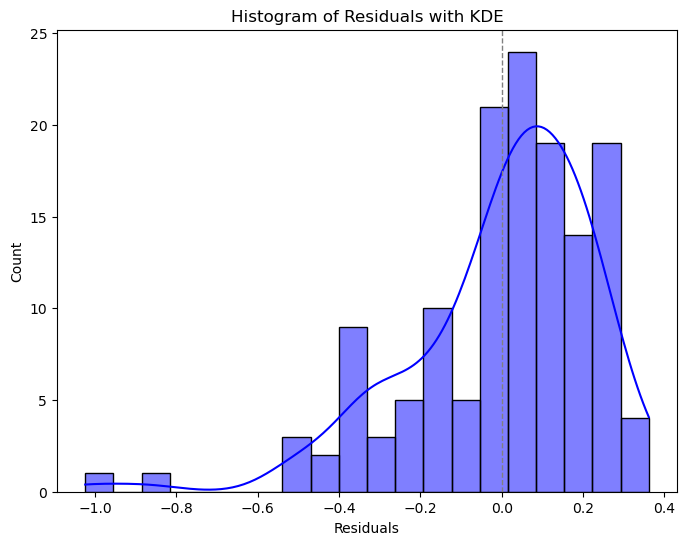

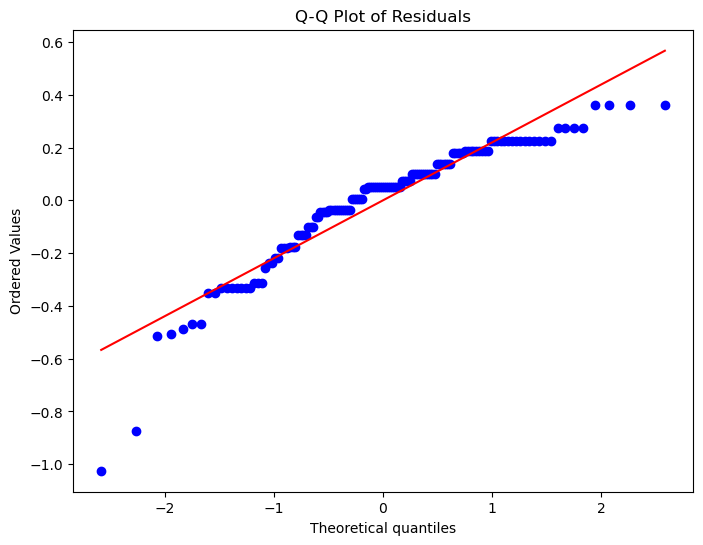

In [164]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram with KDE
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=20)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals with KDE')
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [165]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk test statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

Shapiro-Wilk test statistic: 0.90034019947052, p-value: 3.287895466996815e-08


In [166]:
glm_model = sm.GLM(user_summary['accuracy'], sm.add_constant(user_summary[['stimulus_type', 'pair']]),
                   family=sm.families.Binomial()).fit()
print(glm_model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [167]:
print(user_summary.isnull().sum())

userId           0
stimulus_type    0
pair             0
accuracy         0
avg_rt           0
log_accuracy     0
dtype: int64


In [171]:
user_summary['accuracy'] = pd.to_numeric(user_summary['accuracy'], errors='coerce')
user_summary['stimulus_type'] = user_summary['stimulus_type'].astype('category')
user_summary['pair'] = user_summary['pair'].astype('category')

In [191]:
user_summary

,userId,stimulus_type,pair,accuracy,avg_rt,log_accuracy
0,0017,rectangle,CD,0.916667,2457.583333,-8.701138e-02
1,0017,rectangle,TD,0.833333,1547.333333,-1.823216e-01
2,0017,star,CD,0.750000,2650.166667,-2.876821e-01
3,0017,star,TD,1.000000,1609.000000,1.000000e-10
4,0373,rectangle,CD,0.833333,3681.416667,-1.823216e-01
...,...,...,...,...,...,...
135,9533,star,TD,1.000000,7940.666667,1.000000e-10
136,9628,rectangle,CD,0.666667,2223.666667,-4.054651e-01
137,9628,rectangle,TD,0.583333,2949.000000,-5.389965e-01
138,9628,star,CD,1.000000,3138.500000,1.000000e-10


In [173]:
import statsmodels.api as sm

# Prepare the model
model = sm.GLM(user_summary['accuracy'], 
               sm.add_constant(user_summary[['stimulus_type', 'pair']]), 
               family=sm.families.Binomial())

# Fit the model
results = model.fit()
print(results.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [174]:
print(user_summary.dtypes)

userId             object
stimulus_type    category
pair             category
accuracy          float64
avg_rt            float64
log_accuracy      float64
dtype: object


In [175]:
print(user_summary.isnull().sum())

userId           0
stimulus_type    0
pair             0
accuracy         0
avg_rt           0
log_accuracy     0
dtype: int64


In [176]:
# Create dummy variables for categorical columns
user_summary_dummies = pd.get_dummies(user_summary, columns=['stimulus_type', 'pair'], drop_first=True)

In [177]:
import statsmodels.api as sm

# Prepare the model
model = sm.GLM(user_summary_dummies['accuracy'],
               sm.add_constant(user_summary_dummies.drop(['userId', 'accuracy'], axis=1)),
               family=sm.families.Binomial())

# Fit the model
results = model.fit()
print(results.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [186]:
import statsmodels.api as sm
from statsmodels.formula.api import glm
from patsy import dmatrices  # Import dmatrices from patsy
# Define the formula for the model
# formula = 'accuracy ~ stimulus_type + pair'
# Define the model formula including interaction
formula = 'accuracy ~ C(stimulus_type) * C(pair)'

# Create design matrices
y, X = dmatrices(formula, data=user_summary, return_type='dataframe')

# Check the resulting matrices
print(y.head())
print(X.head())

   accuracy
0  0.916667
1  0.833333
2  0.750000
3  1.000000
4  0.833333
   Intercept  C(stimulus_type)[T.star]  C(pair)[T.TD]  \
0        1.0                       0.0            0.0   
1        1.0                       0.0            1.0   
2        1.0                       1.0            0.0   
3        1.0                       1.0            1.0   
4        1.0                       0.0            0.0   

   C(stimulus_type)[T.star]:C(pair)[T.TD]  
0                                     0.0  
1                                     0.0  
2                                     0.0  
3                                     1.0  
4                                     0.0  


In [187]:
# Fit the GLM model
model = sm.GLM(y, X, family=sm.families.Binomial())
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               accuracy   No. Observations:                  140
Model:                            GLM   Df Residuals:                      136
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -44.626
Date:                Fri, 25 Oct 2024   Deviance:                       27.092
Time:                        13:14:10   Pearson chi2:                     25.4
No. Iterations:                     5   Pseudo R-squ. (CS):            0.04596
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [188]:
import numpy as np
import scipy.stats as stats

def interpret_glm_results(results):
    """
    Function to interpret key GLM results from a fitted statsmodels GLM results object.
    Outputs a summary of deviance and significance of coefficients.
    """
    # Model fit statistics: Deviance, Null Deviance, and pseudo-R²
    null_deviance = results.null_deviance if hasattr(results, 'null_deviance') else np.nan
    residual_deviance = results.deviance if hasattr(results, 'deviance') else np.nan
    
    pseudo_r_squared = 1 - (residual_deviance / null_deviance) if null_deviance != 0 else np.nan

    print(f"Model Fit Statistics:\nPseudo R²: {pseudo_r_squared:.3f}")
    print(f"Null Deviance: {null_deviance:.2f}\nResidual Deviance: {residual_deviance:.2f}\n")
    
    # Coefficients table
    print("Coefficient Interpretations:")
    for index, coef in enumerate(results.params):
        param_name = results.model.exog_names[index]
        std_err = results.bse[index]
        z_val = coef / std_err
        p_val = results.pvalues[index]
        
        # Determine significance and direction of effect
        significance = "significant" if p_val < 0.05 else "not significant"
        direction = "positive" if coef > 0 else "negative"
        
        # Formatting p-value for readability
        p_val_formatted = f"{p_val:.3f}" if p_val >= 0.001 else "<0.001"
        
        # Compute 95% confidence interval
        conf_int = results.conf_int().iloc[index]
        conf_int_low, conf_int_high = conf_int
        
        print(f"- {param_name}: Coefficient = {coef:.3f}, Std Err = {std_err:.3f}")
        print(f"  Z = {z_val:.3f}, p = {p_val_formatted}")
        print(f"  Interpretation: The effect is {significance} and {direction}.")
        print(f"  95% CI: ({conf_int_low:.3f}, {conf_int_high:.3f})\n")

# Example usage:
# Make sure `results` is the fitted GLM results object
# results = glm_model.fit()  # glm_model being the model you specified with GLM()
interpret_glm_results(results)

Model Fit Statistics:
Pseudo R²: 0.196
Null Deviance: 33.68
Residual Deviance: 27.09

Coefficient Interpretations:
- Intercept: Coefficient = 1.851, Std Err = 0.494
  Z = 3.751, p = <0.001
  Interpretation: The effect is significant and positive.
  95% CI: (0.884, 2.819)

- C(stimulus_type)[T.star]: Coefficient = -0.976, Std Err = 0.617
  Z = -1.581, p = 0.114
  Interpretation: The effect is not significant and negative.
  95% CI: (-2.186, 0.234)

- C(pair)[T.TD]: Coefficient = 0.714, Std Err = 0.821
  Z = 0.869, p = 0.385
  Interpretation: The effect is not significant and positive.
  95% CI: (-0.896, 2.323)

- C(stimulus_type)[T.star]:C(pair)[T.TD]: Coefficient = 0.127, Std Err = 1.016
  Z = 0.125, p = 0.901
  Interpretation: The effect is not significant and positive.
  95% CI: (-1.865, 2.119)



/var/folders/kc/rbd8sj0d2q7bh_61jwm5hsf00000gn/T/ipykernel_2430/4148295722.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  std_err = results.bse[index]
/var/folders/kc/rbd8sj0d2q7bh_61jwm5hsf00000gn/T/ipykernel_2430/4148295722.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = results.pvalues[index]


In [193]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model without interaction term
model_main_effects = ols('accuracy ~ C(stimulus_type) + C(pair)', data=user_summary).fit()

# Fit the model with interaction term
model_with_interaction = ols('accuracy ~ C(stimulus_type) * C(pair)', data=user_summary).fit()

# Print AIC and BIC for both models
print("Model without Interaction:")
print(f"AIC: {model_main_effects.aic}")
print(f"BIC: {model_main_effects.bic}")

print("\nModel with Interaction:")
print(f"AIC: {model_with_interaction.aic}")
print(f"BIC: {model_with_interaction.bic}")

# Compare the two models based on AIC and BIC
aic_diff = model_main_effects.aic - model_with_interaction.aic
bic_diff = model_main_effects.bic - model_with_interaction.bic

print("\nDifference in AIC (main effects - interaction):", aic_diff)
print("Difference in BIC (main effects - interaction):", bic_diff)

Model without Interaction:
AIC: -114.36355256145475
BIC: -105.53862529362684

Model with Interaction:
AIC: -114.49888671973474
BIC: -102.73231702929752

Difference in AIC (main effects - interaction): 0.13533415827998851
Difference in BIC (main effects - interaction): -2.806308264329317


In [195]:
# Step 2: Simple Main Effects Analysis
for stimulus in user_summary['stimulus_type'].unique():
    print(f"Simple Main Effects for stimulus_type: {stimulus}")
    
    # Filter data for the current stimulus_type
    filtered_data = user_summary[user_summary['stimulus_type'] == stimulus]
    
    # Fit the model for the current stimulus_type
    model = ols('accuracy ~ C(pair)', data=filtered_data).fit()
    
    # Get ANOVA table
    anova_results = sm.stats.anova_lm(model, typ=2)
    print(anova_results)
    
    # Interpretation of the ANOVA results:
    p_value = anova_results['PR(>F)']['C(pair)']
    
    # Conditional interpretation based on p-value
    if p_value < 0.05:
        print(f"Interpretation: The effect of 'pair' on 'accuracy' is statistically significant for stimulus_type '{stimulus}'.")
        print("This indicates that the accuracy levels for CD and TD pairs differ significantly for this stimulus type.")
    else:
        print(f"Interpretation: The effect of 'pair' on 'accuracy' is not statistically significant for stimulus_type '{stimulus}'.")
        print("This suggests that there is no meaningful difference in accuracy between CD and TD pairs for this stimulus type.")

Simple Main Effects for stimulus_type: rectangle
            sum_sq    df         F  PR(>F)
C(pair)   0.072321   1.0  5.346419  0.0238
Residual  0.919841  68.0       NaN     NaN
Interpretation: The effect of 'pair' on 'accuracy' is statistically significant for stimulus_type 'rectangle'.
This indicates that the accuracy levels for CD and TD pairs differ significantly for this stimulus type.
Simple Main Effects for stimulus_type: star
            sum_sq    df         F    PR(>F)
C(pair)   0.351669   1.0  9.576158  0.002861
Residual  2.497194  68.0       NaN       NaN
Interpretation: The effect of 'pair' on 'accuracy' is statistically significant for stimulus_type 'star'.
This indicates that the accuracy levels for CD and TD pairs differ significantly for this stimulus type.


/Users/vani/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


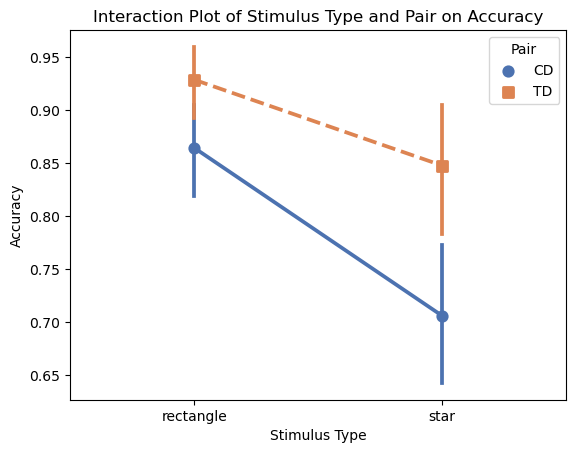

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Step 1: Create an Interaction Plot
sns.pointplot(x='stimulus_type', y='accuracy', hue='pair', data=user_summary, 
               palette='deep', markers=['o', 's'], linestyles=['-', '--'])
plt.title('Interaction Plot of Stimulus Type and Pair on Accuracy')
plt.xlabel('Stimulus Type')
plt.ylabel('Accuracy')
plt.legend(title='Pair')
plt.show()

In [197]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multitest import multipletests

# Step 1: Prepare the data for paired t-tests
results = []

for stimulus in user_summary['stimulus_type'].unique():
    filtered_data = user_summary[user_summary['stimulus_type'] == stimulus]
    
    # Ensure we have both pairs (CD and TD) for the same subjects
    cd_scores = filtered_data[filtered_data['pair'] == 'CD']['accuracy']
    td_scores = filtered_data[filtered_data['pair'] == 'TD']['accuracy']
    
    # Perform paired t-test if both scores exist
    if len(cd_scores) == len(td_scores):
        t_stat, p_value = stats.ttest_rel(cd_scores, td_scores)
        results.append({'stimulus_type': stimulus, 't_stat': t_stat, 'p_value': p_value})

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Step 2: Correct for multiple comparisons
results_df['p_corrected'] = multipletests(results_df['p_value'], method='holm')[1]

# Step 3: Print results and interpretations
for index, row in results_df.iterrows():
    stimulus = row['stimulus_type']
    p_corrected = row['p_corrected']
    
    print(f"Stimulus Type: {stimulus}")
    print(f"T-statistic: {row['t_stat']}, Corrected p-value: {p_corrected}")
    
    # Conditional interpretation based on corrected p-value
    if p_corrected < 0.05:
        print("Interpretation: The accuracy for CD and TD pairs differs significantly.")
    else:
        print("Interpretation: No significant difference in accuracy for CD and TD pairs.")
    print()  # Blank line for readability

Stimulus Type: rectangle
T-statistic: -2.8667350350657124, Corrected p-value: 0.007069684164657831
Interpretation: The accuracy for CD and TD pairs differs significantly.

Stimulus Type: star
T-statistic: -4.125599330013118, Corrected p-value: 0.0004511797049536492
Interpretation: The accuracy for CD and TD pairs differs significantly.



In [199]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Step 1: Fit the regression model with the interaction term
model_interaction = ols('accuracy ~ C(stimulus_type) * C(pair)', data=user_summary).fit()

# Step 2: Get the summary of the regression model
summary = model_interaction.summary()
print(summary)

# Step 3: Interpret the coefficients
coefficients = model_interaction.params
print("\nCoefficients:")
print(coefficients)

# Step 4: Identify and interpret the interaction term
interaction_terms = [term for term in coefficients.index if 'C(stimulus_type)' in term and 'C(pair)' in term]

# Check if there are any interaction terms
if interaction_terms:
    for interaction_term in interaction_terms:
        print(f"\nCoefficient for {interaction_term}: {coefficients[interaction_term]:.3f}")
        # Check if the interaction term is significant
        if model_interaction.pvalues[interaction_term] < 0.05:
            print(f"Interpretation: The interaction term '{interaction_term}' is statistically significant.")
            print("This means that the effect of 'pair' on accuracy differs for the two stimulus types.")
        else:
            print(f"Interpretation: The interaction term '{interaction_term}' is not statistically significant.")
            print("This suggests that the effect of 'pair' on accuracy does not differ significantly between the stimulus types.")
else:
    print("\nNo interaction terms found in the model output.")

# Step 5: Additional Interpretation of Coefficients
print("\nInterpretation of Coefficients:")
for term, coef in coefficients.items():
    if 'C(' in term:  # Only interpret categorical terms
        print(f"The coefficient for {term} is {coef:.3f}. This indicates the effect of {term} on accuracy relative to the baseline.")

                            OLS Regression Results                            
Dep. Variable:               accuracy   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     12.28
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           3.71e-07
Time:                        13:53:49   Log-Likelihood:                 61.249
No. Observations:                 140   AIC:                            -114.5
Df Residuals:                     136   BIC:                            -102.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
rectangle | CD rectangle | TD   0.0595 0.3475 -0.0335  0.1525  False
rectangle | CD      star | CD  -0.1499 0.0003 -0.2429 -0.0569   True
rectangle | CD      star | TD   0.0084 0.9955 -0.0846  0.1014  False
rectangle | TD      star | CD  -0.2094    0.0 -0.3024 -0.1164   True
rectangle | TD      star | TD  -0.0511 0.4843 -0.1441  0.0419  False
     star | CD      star | TD   0.1583 0.0001  0.0653  0.2513   True
--------------------------------------------------------------------


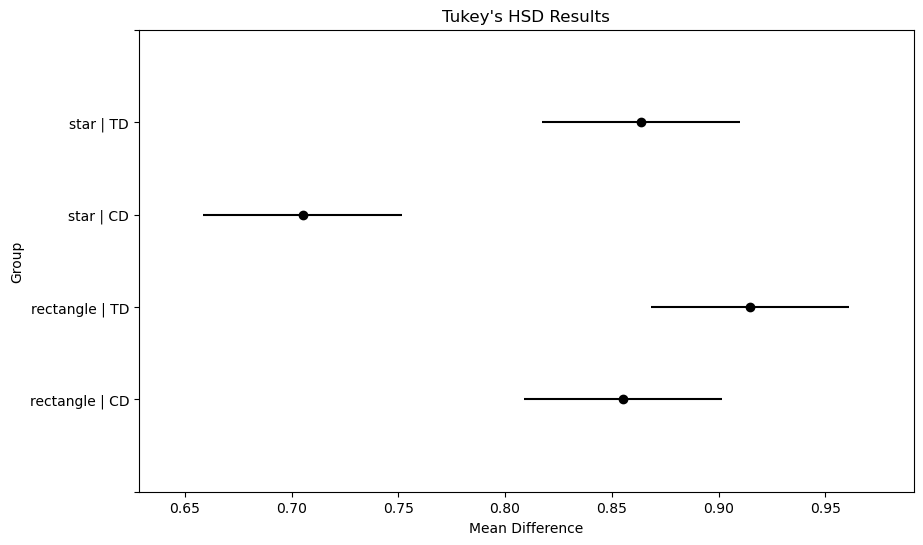

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Step 1: Fit the regression model with the interaction term
model_interaction = ols('accuracy ~ C(stimulus_type) * C(pair)', data=user_summary).fit()

# Step 2: Get the residuals and add the model's fitted values
user_summary['fitted'] = model_interaction.fittedvalues
user_summary['residuals'] = model_interaction.resid

# Step 3: Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=user_summary['accuracy'], groups=user_summary['stimulus_type'].astype(str) + ' | ' + user_summary['pair'].astype(str), alpha=0.05)

# Step 4: Print the results of Tukey's test
print(tukey_result)

# Step 5: Plot the results (optional)
import matplotlib.pyplot as plt
tukey_result.plot_simultaneous()
plt.title("Tukey's HSD Results")
plt.xlabel("Mean Difference")
plt.ylabel("Group")
plt.show()

In [211]:
user_summary

,userId,stimulus_type,pair,accuracy,avg_rt,log_accuracy,fitted,residuals
0,0017,rectangle,CD,0.916667,2457.583333,-8.701138e-02,0.864286,0.052381
1,0017,rectangle,TD,0.833333,1547.333333,-1.823216e-01,0.928571,-0.095238
2,0017,star,CD,0.750000,2650.166667,-2.876821e-01,0.705861,0.044139
3,0017,star,TD,1.000000,1609.000000,1.000000e-10,0.847619,0.152381
4,0373,rectangle,CD,0.833333,3681.416667,-1.823216e-01,0.864286,-0.030952
...,...,...,...,...,...,...,...,...
135,9533,star,TD,1.000000,7940.666667,1.000000e-10,0.847619,0.152381
136,9628,rectangle,CD,0.666667,2223.666667,-4.054651e-01,0.864286,-0.197619
137,9628,rectangle,TD,0.583333,2949.000000,-5.389965e-01,0.928571,-0.345238
138,9628,star,CD,1.000000,3138.500000,1.000000e-10,0.705861,0.294139


Columns in user_summary: Index(['userId', 'stimulus_type', 'pair', 'accuracy', 'avg_rt', 'log_accuracy',
       'fitted', 'residuals', 'group'],
      dtype='object')
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
rectangle | CD rectangle | TD   0.0643 0.3295 -0.0343  0.1628  False
rectangle | CD      star | CD  -0.1584 0.0003  -0.257 -0.0599   True
rectangle | CD      star | TD  -0.0167 0.9714 -0.1152  0.0819  False
rectangle | TD      star | CD  -0.2227    0.0 -0.3213 -0.1242   True
rectangle | TD      star | TD   -0.081 0.1469 -0.1795  0.0176  False
     star | CD      star | TD   0.1418 0.0015  0.0432  0.2403   True
--------------------------------------------------------------------


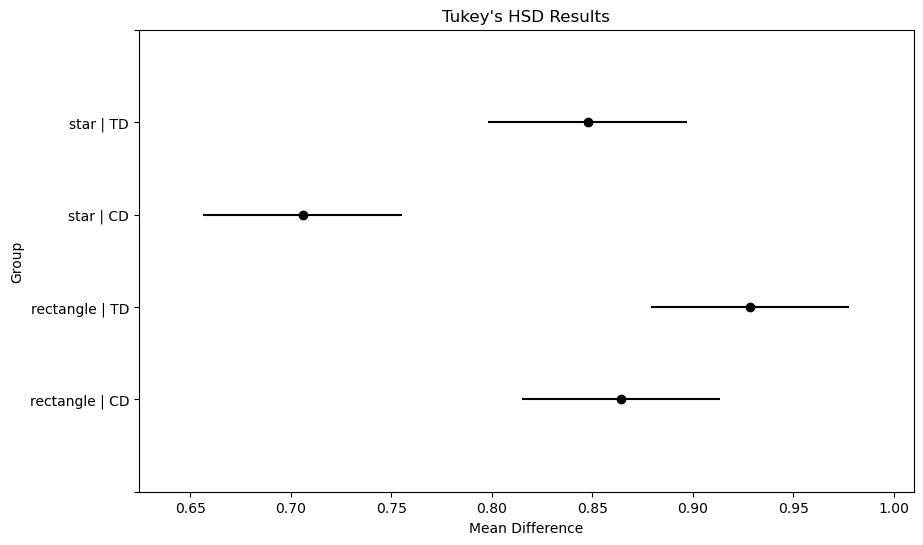

rectangle | CD vs rectangle | TD: Cohen's d = 0.553
rectangle | CD vs star | CD: Cohen's d = 0.949
rectangle | CD vs star | TD: Cohen's d = 0.102
rectangle | TD vs star | CD: Cohen's d = 1.457
rectangle | TD vs star | TD: Cohen's d = 0.541
star | CD vs star | TD: Cohen's d = 0.740


In [214]:
if 'stimulus_type' in user_summary.columns and 'pair' in user_summary.columns:
    user_summary['group'] = user_summary['stimulus_type'].astype(str) + ' | ' + user_summary['pair'].astype(str)
else:
    print("Error: Required columns 'stimulus_type' and 'pair' are not in the dataframe.")

# Check if the 'group' column exists
print("Columns in user_summary:", user_summary.columns)

# Step 4: Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(
    endog=user_summary['accuracy'], 
    groups=user_summary['group'], 
    alpha=0.05
)

# Step 5: Print and plot the results of Tukey's test
print(tukey_result)
tukey_result.plot_simultaneous()
plt.title("Tukey's HSD Results")
plt.xlabel("Mean Difference")
plt.ylabel("Group")
plt.show()

# Step 6: Calculate Cohen's d for effect sizes
cohens_d_results = {}
groups = user_summary['group'].unique()  # Retrieve unique groups

# Calculate Cohen's d for each pairwise combination
for i, group1 in enumerate(groups):
    for group2 in groups[i+1:]:
        data1 = user_summary[user_summary['group'] == group1]['accuracy']
        data2 = user_summary[user_summary['group'] == group2]['accuracy']
        
        # Calculate means and standard deviations
        mean_diff = np.abs(data1.mean() - data2.mean())
        pooled_std = np.sqrt(((len(data1) - 1) * data1.var() + (len(data2) - 1) * data2.var()) / (len(data1) + len(data2) - 2))
        
        # Calculate Cohen's d
        cohen_d = mean_diff / pooled_std if pooled_std > 0 else np.nan
        cohens_d_results[f"{group1} vs {group2}"] = cohen_d

# Print Cohen's d results
for comparison, d_value in cohens_d_results.items():
    print(f"{comparison}: Cohen's d = {d_value:.3f}")

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
rectangle | CD rectangle | TD  -0.5357 0.0722 -1.1038 0.0324  False
rectangle | CD      star | CD   -0.017 0.9998 -0.5851 0.5511  False
rectangle | CD      star | TD  -0.2452 0.6761 -0.8133 0.3229  False
rectangle | TD      star | CD   0.5187 0.0869 -0.0494 1.0868  False
rectangle | TD      star | TD   0.2905 0.5456 -0.2776 0.8586  False
     star | CD      star | TD  -0.2282 0.7234 -0.7963 0.3399  False
-------------------------------------------------------------------


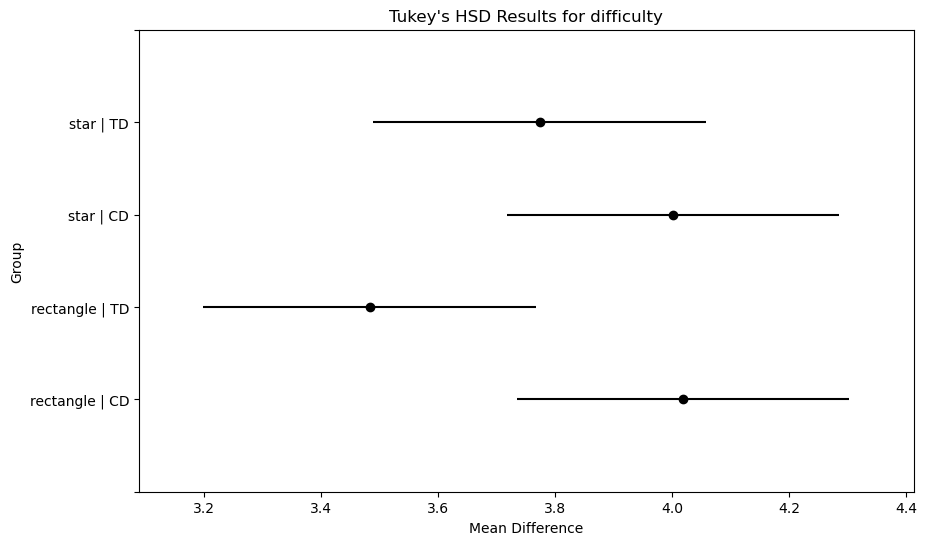

In [208]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Step 1: Fit the regression model with the interaction term
model_interaction = ols('mean_difficulty ~ C(stimulus_type) * C(pair)', data=difficulty_summary).fit()

# Step 2: Get the residuals and add the model's fitted values
user_summary['fitted'] = model_interaction.fittedvalues
user_summary['residuals'] = model_interaction.resid

# Step 3: Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=difficulty_summary['mean_difficulty'], groups=difficulty_summary['stimulus_type'].astype(str) + ' | ' + difficulty_summary['pair'].astype(str), alpha=0.05)

# Step 4: Print the results of Tukey's test
print(tukey_result)

# Step 5: Plot the results (optional)
import matplotlib.pyplot as plt
tukey_result.plot_simultaneous()
plt.title("Tukey's HSD Results for difficulty")
plt.xlabel("Mean Difference")
plt.ylabel("Group")
plt.show()

In [206]:
difficulty_summary

,userId,stimulus_type,pair,mean_difficulty
0,0017,rectangle,CD,2.083333
1,0017,rectangle,TD,1.750000
2,0017,star,CD,1.500000
3,0017,star,TD,1.666667
4,0373,rectangle,CD,4.416667
...,...,...,...,...
135,9533,star,TD,2.333333
136,9628,rectangle,CD,4.500000
137,9628,rectangle,TD,4.416667
138,9628,star,CD,4.833333
